#**Análisis de Hotel Reservas de Clientes**

El dataset contiene los diferentes atributos de los datos de reserva de clientes. A continuación se detalla el diccionario de datos:

*   Booking_ID: identificador único de cada reserva.
*   no_of_adults: Número de adultos.
*   no_of_children: Número de niños.
*   no_of_weekend_nights: Número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para alojarse en el hotel.
*   no_of_week_nights: Número de noches entre semana (de lunes a viernes) que el huésped se alojó o reservó para alojarse en el hotel.
*   type_of_meal_plan: Tipo de plan de comidas reservado por el cliente.
*   plaza_de_aparcamiento_necesaria: ¿Necesita el cliente una plaza de aparcamiento? (0 - No, 1- Sí).
*   room_type_reserved: Tipo de habitación reservada por el cliente. Los valores son cifrados (codificados) por INN Hotels.
*   lead_time: Número de días entre la fecha de reserva y la fecha de llegada.
*   año_llegada: Año de la fecha de llegada.
*   arrival_month: Mes de la fecha de llegada.
*   arrival_date: Fecha del mes.
*   market_segment_type: Denominación del segmento de mercado.
*   repeated_guest: ¿Es el cliente un huésped repetido? (0 - No, 1- Sí).
*   no_of_previous_cancellations: Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.
*   no_of_previous_bookings_not_canceled: Número de reservas anteriores no canceladas por el cliente antes de la reserva actual.
*   avg_price_per_room: Precio medio por día de la reserva; los precios de las habitaciones son dinámicos. (en euros).
*   no_of_special_requests: Número total de peticiones especiales realizadas por el cliente (por ejemplo, piso alto, vistas desde la habitación, etc.).
*   booking_status: Bandera que indica si la reserva fue cancelada o no.   


##Importamos librerias

In [ ]:
#Procesamiento
import pandas as pd
import numpy as np
import os
import datetime as dt

#Manejo de valores núlos
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

##Cargamos el conjunto de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargamos el path del los archivos en la variable ruta
ruta = '/content/drive/MyDrive/AnalisisDatos/'
#Listamos los archivos que tenemos en la carpeta files
os.listdir(ruta)

['files',
 'ViolenciaIntrafamiliar.csv',
 'raw_data.csv',
 'obesity.csv',
 'Ventas.ipynb',
 'MachineLearningMindMap.png',
 'ViolenciaIntrafamiliar.ipynb',
 'Obesity.ipynb',
 'EjerciciosCienciaDatos.docx',
 'HotelReservations.csv',
 'HotelReservation.ipynb']

In [ ]:
df = pd.read_csv(ruta+'/HotelReservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.shape

(36275, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

##1.    Limpieza del conjunto de datos

1.1.    Datos núlos

In [ ]:
missing_values_count  = df.isna().sum()
missing_values_count

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

1.2.    Cambio de variables Object a Category

In [ ]:
columnas_catergoricas = df.select_dtypes(exclude=[np.number])

for i in columnas_catergoricas.columns:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

1.3.    Registros duplicados.

In [ ]:
df[df.duplicated()]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


1.4.    Datos únicos

In [ ]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64


  
 18  booking_status                        36275 non-null  category

In [ ]:
df['type_of_meal_plan'].unique()

['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']
Categories (4, object): ['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected']

In [ ]:
df['room_type_reserved'].unique()

['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5', 'Room_Type 7', 'Room_Type 3']
Categories (7, object): ['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5',
                         'Room_Type 6', 'Room_Type 7']

In [ ]:
df['market_segment_type'].unique()

['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']
Categories (5, object): ['Aviation', 'Complementary', 'Corporate', 'Offline', 'Online']

In [ ]:
df['booking_status'].unique()

['Not_Canceled', 'Canceled']
Categories (2, object): ['Canceled', 'Not_Canceled']

In [ ]:
def grafica_categorica(col_cat):
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(col_cat.shape[1]/2)
    # Gráficos de barras de conteo
    fig, ax = plt.subplots(nrows=filas, ncols=2, figsize=(10, filas*5))

    #Aplanamos para iterar por el gráfico como si fuera de una dimensión en lugar de 2
    ax=ax.flat
    fig.subplots_adjust(hspace=0.5)
    for i, col in enumerate(col_cat):
        sns.countplot(x=col, data=col_cat, ax=ax[i], hue=col, palette='Set2')
        #ax[i].set_title(col)
        ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, fontsize=7)

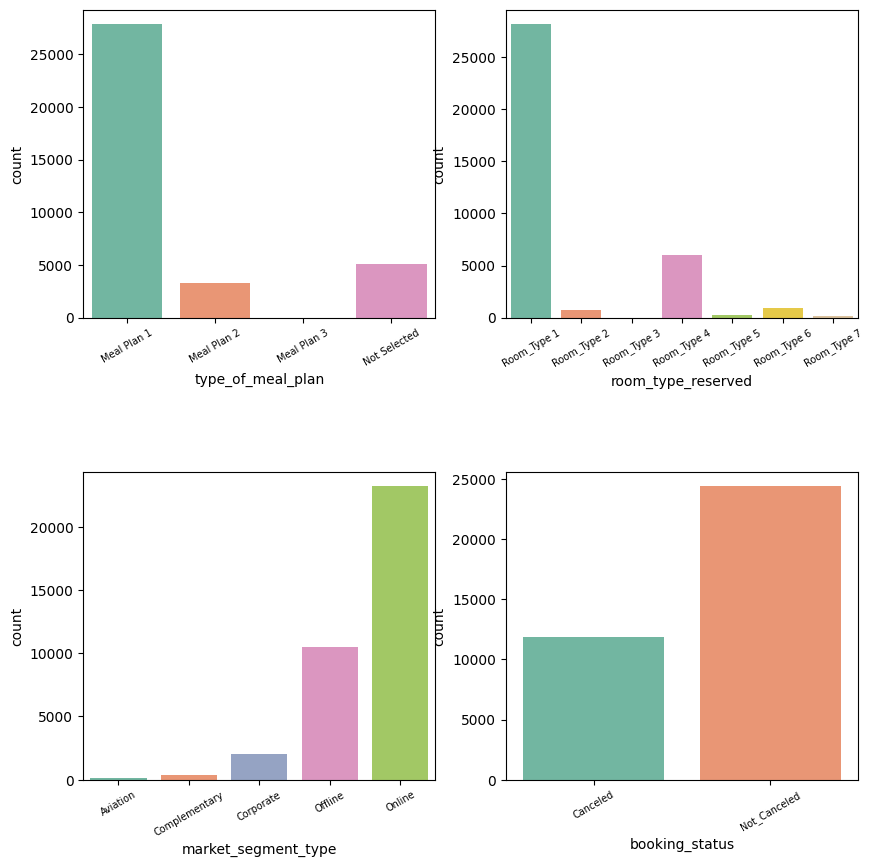

In [ ]:
df_categorico = df.select_dtypes(include=['category'])
df_categorico.drop(columns='Booking_ID', axis=1, inplace=True)
grafica_categorica(df_categorico)

In [ ]:
def estadisticos_cont(num):
    #calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #lo retornamos
    return (estadisticos)

In [ ]:
df_numerico = df.select_dtypes(include=['number'])
estadisticos_cont(df_numerico)

,count,mean,std,min,25%,50%,75%,max,median
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0,2.00
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0,0.00
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0,1.00
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0,2.00
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0,0.00
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0,57.00
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0,2018.00
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0,8.00
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0,16.00
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0,0.00


##2.    Análisis Exploratorio de Datos EDA.

Exploración del impacto de las elecciones de los huéspedes en los resultados de las reservas.

En este proyecto de análisis exploratorio de datos, profundizaremos en un conjunto de datos relacionados con las reservas hoteleras, centrándonos principalmente en comprender las relaciones entre los factores clave y los resultados de las reservas. Las siguientes columnas serán fundamentales para nuestro análisis:

*   **Tipo de régimen de comidas:** Investigaremos cómo la elección del plan de comidas, seleccionada por los huéspedes, se asocia con el estado de la reserva (si una reserva fue cancelada o no).
*   **Tipo de habitación reservada:** Examinaremos cómo la selección de tipos de habitación, como "Individual", "Doble" o "Suite", influye en los resultados de la reserva.
*   **Tipo de segmento de mercado:** Estudiaremos cómo influyen en el estado de la reserva los distintos segmentos de mercado, como "Agencias de viajes online", "Empresas", "Directo" y otros.


Utilizando booking_status como matiz, crearemos visualizaciones basadas en el recuento para comprender mejor la distribución de las opciones de planes de comidas, los tipos de habitación y los segmentos de mercado, con especial atención a las tasas de cancelación.

2.1.    Mes con mas reservación

In [ ]:
cantidad_mes = df['arrival_month'].value_counts()
cantidad_mes

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64

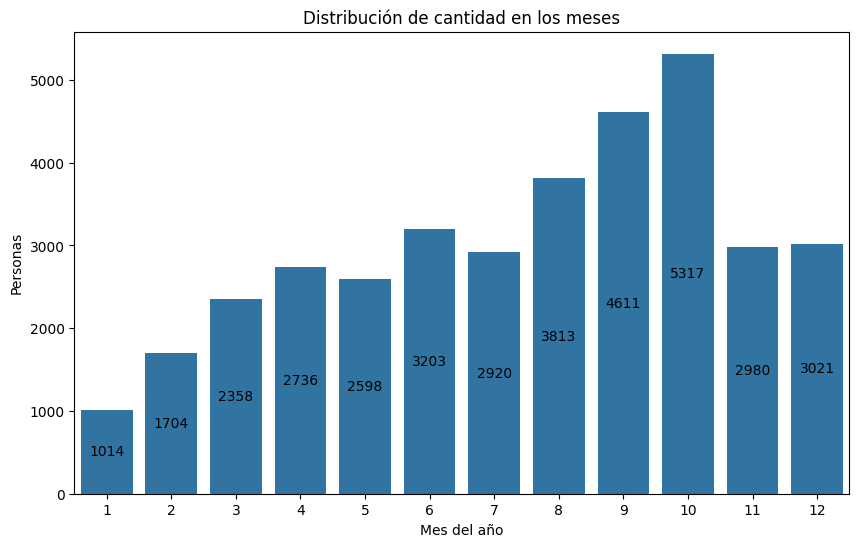

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=cantidad_mes.index, y=cantidad_mes.values)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center')
plt.title("Distribución de cantidad en los meses")
plt.xlabel('Mes del año')
plt.ylabel('Personas')
plt.show()

2.2.    Distribución de la cancelación

(-1.0999999964410538,
 1.0999999815392996,
 -1.09999998011864,
 1.0999999990532685)

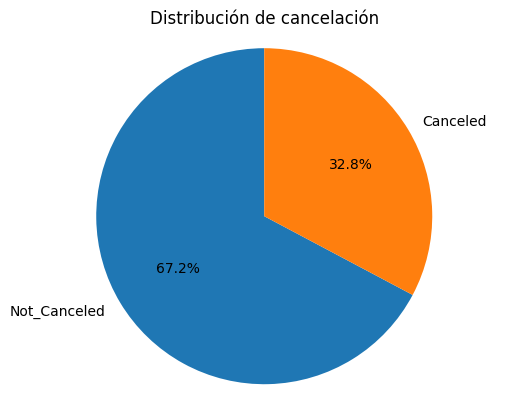

In [ ]:
booking_status_count = df['booking_status'].value_counts()
labels = booking_status_count.index
size = booking_status_count.values

plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de cancelación')
plt.axis('equal')

##2.3.    Frecuencia del plan de comidas por estado de la reserva.

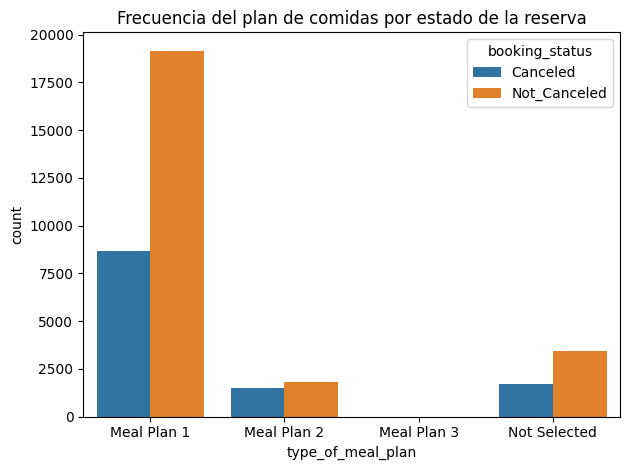

In [ ]:
sns.countplot(data=df, x="type_of_meal_plan", hue="booking_status")
plt.title('Frecuencia del plan de comidas por estado de la reserva')

# Display the plots in a tight layout
plt.tight_layout()
plt.show()

Creamos un nuevo conjunto de datos con solo no cancelados y otro con cancelados

In [ ]:
no_cancelados_df = df[df['booking_status']=='Not_Canceled']
cancelados_df = df[df['booking_status']=='Canceled']

agrupar por "tipo_segmento_mercado" y calcular alguna estadística agregada (por ejemplo, recuento)

In [ ]:
no_cancelados_agrupado = no_cancelados_df.groupby('market_segment_type').count()
cancelados_agrupado = cancelados_df.groupby('market_segment_type').count()

In [ ]:
cancelados_agrupado

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
market_segment_type,,,,,,,,,,,,,,,,,,
Aviation,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
Complementary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Corporate,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220
Offline,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153
Online,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475


In [ ]:
df_resultado = pd.DataFrame({
    'no_cancelada_contado': no_cancelados_agrupado['booking_status'],
    'cancelados_contado': cancelados_agrupado['booking_status']
}).fillna(0)
df_resultado

,no_cancelada_contado,cancelados_contado
market_segment_type,,
Aviation,88,37
Complementary,391,0
Corporate,1797,220
Offline,7375,3153
Online,14739,8475


covertimos la columna cancelados_contado a int

In [ ]:
df_resultado['cancelados_contado'] = df_resultado['cancelados_contado'].astype(int)
df_resultado

,no_cancelada_contado,cancelados_contado
market_segment_type,,
Aviation,88,37
Complementary,391,0
Corporate,1797,220
Offline,7375,3153
Online,14739,8475


Definimos un estilo para mostrar las tablas.

In [ ]:
# Define a styling function
def style_description(s):
    return f'background-color: lightblue; font-weight: bold; color: black'

Aplicamos estilo al conjunto de datos

In [ ]:
estilo_df = df_resultado.style.applymap(style_description)
estilo_df

,no_cancelada_contado,cancelados_contado
market_segment_type,,
Aviation,88,37
Complementary,391,0
Corporate,1797,220
Offline,7375,3153
Online,14739,8475


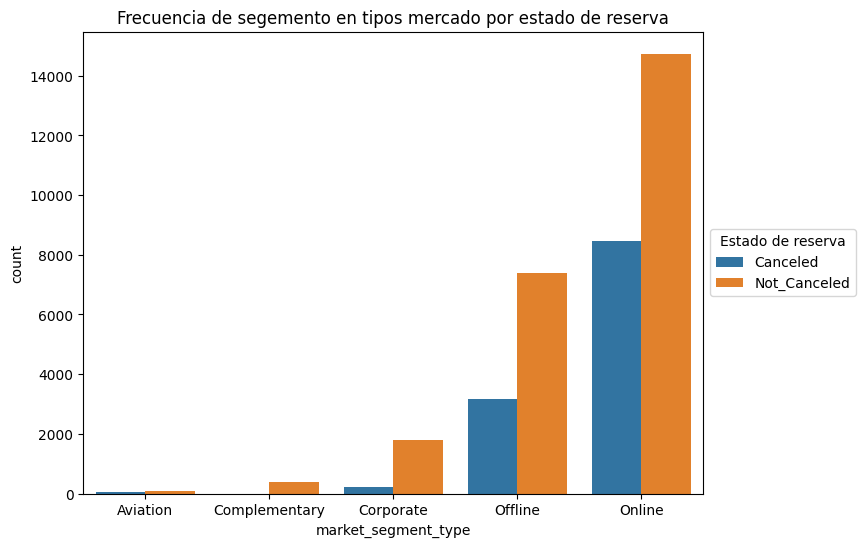

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='market_segment_type', hue='booking_status')
plt.title('Frecuencia de segemento en tipos mercado por estado de reserva')
plt.legend(title='Estado de reserva', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

2.4.    Análisis del tipo de habitación

En el conjunto de datos el tipo de habitaciónmás populares son tipo 1 y tipo 4. Estas habitaciones muestran tiempos de entrega distintos.

Agrupamos por el tipo de habitación reservada y generamos las estadisticas por número de días entre la fecha de reserva y la fecha de llegada.

In [ ]:
estadistica_plazo_entrega_tipo_habitacion = df.groupby('room_type_reserved')['lead_time'].agg(['mean', 'median', 'std']).reset_index()
estadistica_plazo_entrega_tipo_habitacion

,room_type_reserved,mean,median,std
0,Room_Type 1,89.642943,59.0,90.860265
1,Room_Type 2,101.021676,75.0,85.377079
2,Room_Type 3,69.571429,66.0,70.056780
3,Room_Type 4,69.205712,55.0,59.718577
4,Room_Type 5,59.547170,32.0,70.581182
5,Room_Type 6,61.015528,38.0,64.116238
6,Room_Type 7,37.094937,20.5,43.630292


Renombramos las columnas para mayor claridad y damos mejor visibilidad a la tabla

In [ ]:
estadistica_plazo_entrega_tipo_habitacion.columns = ['Tipo de cuarto reservado', 'Plazo medio', 'Mediana del plazo', 'Desviación estandar del plazo']
estadisticas_plazos_entrega = estadistica_plazo_entrega_tipo_habitacion.style.set_properties(subset=['Plazo medio', 'Mediana del plazo', 'Desviación estandar del plazo'], **{'background-color': 'lightblue', 'font-weight': 'bold', 'color': 'black'})
estadisticas_plazos_entrega

,Tipo de cuarto reservado,Plazo medio,Mediana del plazo,Desviación estandar del plazo
0,Room_Type 1,89.642943,59.000000,90.860265
1,Room_Type 2,101.021676,75.000000,85.377079
2,Room_Type 3,69.571429,66.000000,70.056780
3,Room_Type 4,69.205712,55.000000,59.718577
4,Room_Type 5,59.547170,32.000000,70.581182
5,Room_Type 6,61.015528,38.000000,64.116238
6,Room_Type 7,37.094937,20.500000,43.630292


<Figure size 800x600 with 0 Axes>

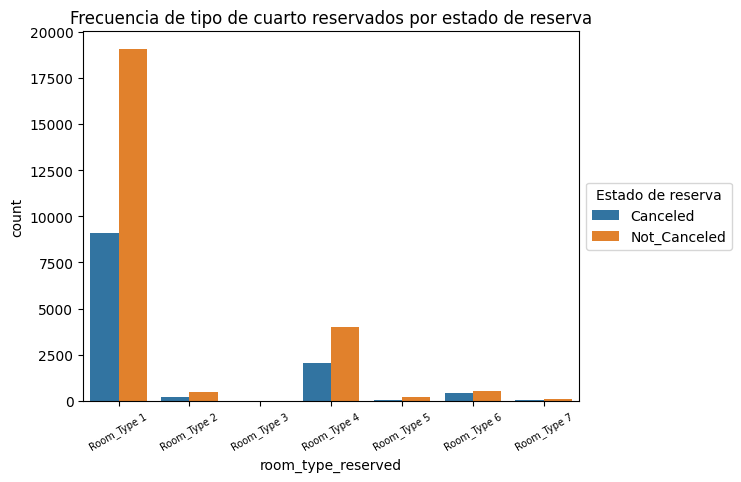

In [ ]:
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
sns.countplot(data=df, x='room_type_reserved', hue='booking_status')
plt.title('Frecuencia de tipo de cuarto reservados por estado de reserva')
plt.legend(title='Estado de reserva', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, fontsize=7)
plt.show()

**Tipo de habitación 1:**

*   Plazo medio: 89,6 días
*   Plazo medio: 59 días
*   Desviación estándar: 90,8 días

El tipo de habitación 1 está muy solicitado, con un plazo medio de 89,6 días, lo que indica una preferencia por las reservas anticipadas.

El plazo medio de 59 días sugiere una tendencia central, pero la considerable desviación estándar de 90,8 días refleja las diversas preferencias de planificación de los huéspedes.

**Tipo de habitación 4:**
*   Plazo medio: 69,5 días
*   Plazo medio: 55 días
*   Desviación estándar: 59,7 días

El tipo de habitación 4, también popular, tiene un plazo de entrega medio ligeramente más corto de 69,5 días, lo que equilibra las reservas tempranas y las más inmediatas.

Con una desviación estándar de 59,7 días, muestra un patrón más coherente en el comportamiento de las reservas en comparación con el tipo de habitación 1.

2.5.  Entender la dinámica de los huéspedes

Las columnas relacionadas con las personas serán el centro de nuestro análisis:
*   Número de adultos: Analizaremos cómo afecta el número de adultos de una reserva al estado de la misma (cancelación o no cancelación), al precio medio de las habitaciones y al tiempo transcurrido entre la reserva y la llegada.
*   Huésped habitual: Nuestro análisis se centrará en si el hecho de que los huéspedes sean clientes habituales (sí o no) influye en el resultado de la reserva, el precio medio de la habitación y el plazo de entrega.
*   Número de niños: Examinaremos cómo el número de niños incluidos en una reserva se asocia con el estado de la reserva, el precio medio de la habitación y el plazo de entrega.
*   Plaza de aparcamiento necesaria: Esta columna se analizará para entender cómo la necesidad de una plaza de aparcamiento (sí o no) en una reserva está relacionada con el estado de la reserva, los precios medios de las habitaciones y los plazos de entrega.

**El objetivo principal de este proyecto es conocer el comportamiento, las preferencias y las necesidades de los clientes durante el proceso de reserva.**

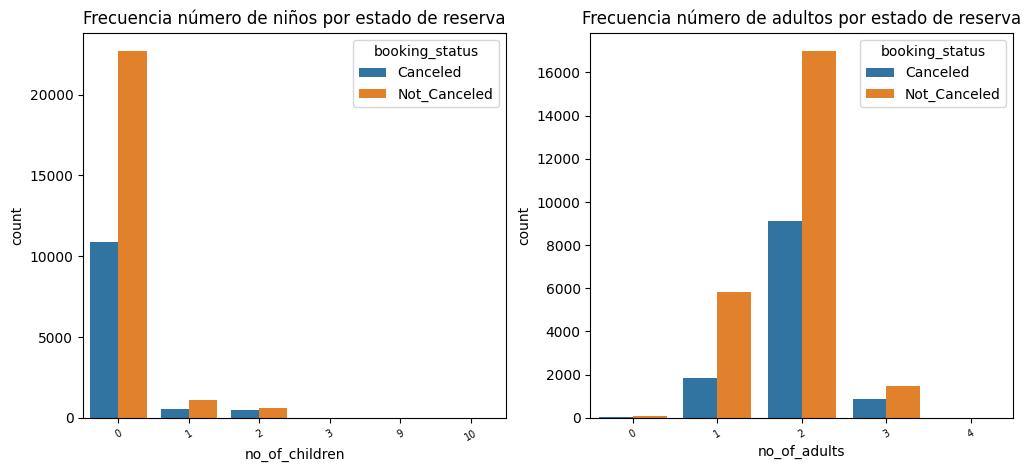

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.countplot(data=df, x='no_of_children', hue='booking_status', ax=ax[0])
ax[0].set_title('Frecuencia número de niños por estado de reserva')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=30, fontsize=7)

sns.countplot(data=df, x='no_of_adults', hue='booking_status', ax=ax[1])
ax[1].set_title('Frecuencia número de adultos por estado de reserva')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=30, fontsize=7)
plt.show()

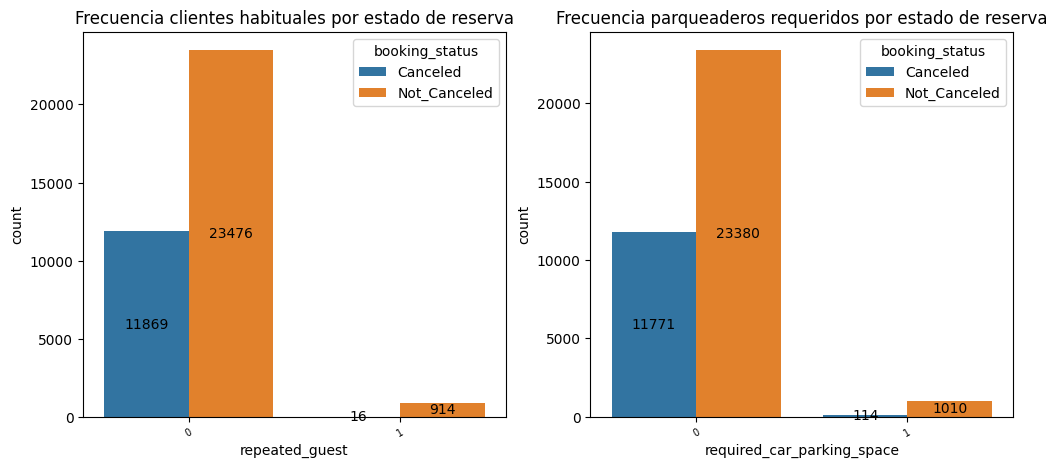

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.countplot(data=df, x='repeated_guest', hue='booking_status', ax=ax[0])
ax[0].set_title('Frecuencia clientes habituales por estado de reserva')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=30, fontsize=7)
ax[0].bar_label(ax[0].containers[0], fmt='%.0f', label_type='center')
ax[0].bar_label(ax[0].containers[1], fmt='%.0f', label_type='center')

sns.countplot(data=df, x='required_car_parking_space', hue='booking_status', ax=ax[1])
ax[1].set_title('Frecuencia parqueaderos requeridos por estado de reserva')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=30, fontsize=7)
ax[1].bar_label(ax[1].containers[0], fmt='%.0f', label_type='center')
ax[1].bar_label(ax[1].containers[1], fmt='%.0f', label_type='center')
plt.show()

2.6.    Columnas clave

Se va a examinar el los valores únicos que se encuentran en las columnas clave.

*   Número previo de cancelaciones

In [ ]:
df_previo_cancelado = df['no_of_previous_cancellations'].value_counts().reset_index()
df_previo_cancelado.columns = ['# previo de cancelaciones', 'Cantidad']
resultados_previo_cancelados = df_previo_cancelado.style.set_properties(subset=['Cantidad'], **{'background-color': 'lightblue', 'font-weight': 'bold', 'color': 'black'})
resultados_previo_cancelados

,# previo de cancelaciones,Cantidad
0,0,35937
1,1,198
2,2,46
3,3,43
4,11,25
5,5,11
6,4,10
7,13,4
8,6,1


*   Número previo de no cancelaciones.
    *   Agrupamos intervalos
    *   Reset the index for the result DataFrame
    *   Ponemos estilo a la tabla

In [ ]:
df_previo_no_cancelado = df['no_of_previous_bookings_not_canceled'].value_counts()
intervalos = [0, 1, 5, 10, 20, 30, 40, 50, max(df_previo_no_cancelado.index)]
intervalos_agrupados = pd.cut(df_previo_no_cancelado.index, intervalos, right=False)
conteo_intervalos = df_previo_no_cancelado.groupby(intervalos_agrupados).sum()

In [ ]:
conteo_intervalos = conteo_intervalos.reset_index()
conteo_intervalos.columns = ['# No cancelados previamente', 'Cantidad']

In [ ]:
resultados_conteo_intervalos = conteo_intervalos.style.applymap(style_description)
resultados_conteo_intervalos
#conteo_intervalos

,# No cancelados previamente,Cantidad
0,"[0, 1)",35463
1,"[1, 5)",485
2,"[5, 10)",162
3,"[10, 20)",95
4,"[20, 30)",36
5,"[30, 40)",13
6,"[40, 50)",12
7,"[50, 58)",8


*   Número de cancelados y no cancelados con respecto a los requisitos.

In [ ]:
no_cancelados_df = df[df['booking_status']=='Not_Canceled']
cancelados_df = df[df['booking_status']=='Canceled']

no_cancelados_agrupado = no_cancelados_df.groupby('no_of_special_requests').count()
cancelados_agrupado = cancelados_df.groupby('no_of_special_requests').count()

df_resultado = pd.DataFrame({
    'no_cancelada_contado': no_cancelados_agrupado['booking_status'],
    'cancelados_contado': cancelados_agrupado['booking_status']
}).fillna(0)

df_resultado['cancelados_contado'] = df_resultado['cancelados_contado'].astype(int)
df_resultado_style = df_resultado.style.applymap(style_description)
df_resultado_style

,no_cancelada_contado,cancelados_contado
no_of_special_requests,,
0,11232,8545
1,8670,2703
2,3727,637
3,675,0
4,78,0
5,8,0


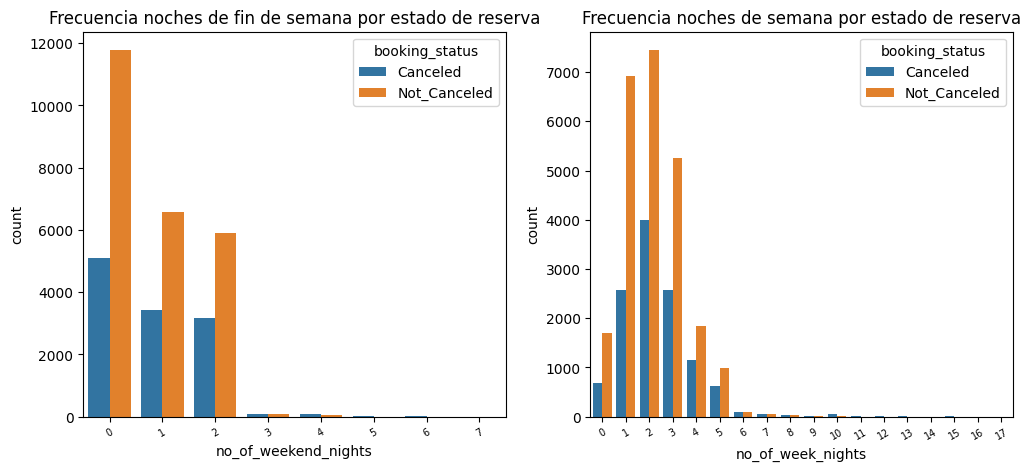

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.countplot(data=df, x='no_of_weekend_nights', hue='booking_status', ax=ax[0])
ax[0].set_title('Frecuencia noches de fin de semana por estado de reserva')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=30, fontsize=7)

sns.countplot(data=df, x='no_of_week_nights', hue='booking_status', ax=ax[1])
ax[1].set_title('Frecuencia noches de semana por estado de reserva')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=30, fontsize=7)
plt.show()

In [ ]:
no_cancelados_df = df[df['booking_status']=='Not_Canceled']
cancelados_df = df[df['booking_status']=='Canceled']

no_cancelados_agrupado = no_cancelados_df.groupby('no_of_weekend_nights').count()
cancelados_agrupado = cancelados_df.groupby('no_of_weekend_nights').count()

df_resultado = pd.DataFrame({
    'no_cancelada_contado': no_cancelados_agrupado['booking_status'],
    'cancelados_contado': cancelados_agrupado['booking_status']
}).fillna(0)

df_resultado['cancelados_contado'] = df_resultado['cancelados_contado'].astype(int)
df_resultado['no_cancelada_contado'] = df_resultado['no_cancelada_contado'].astype(int)
df_resultado_style = df_resultado.style.applymap(style_description)
df_resultado_style

,no_cancelada_contado,cancelados_contado
no_of_weekend_nights,,
0,11779,5093
1,6563,3432
2,5914,3157
3,79,74
4,46,83
5,5,29
6,4,16
7,0,1


In [ ]:
no_cancelados_df = df[df['booking_status']=='Not_Canceled']
cancelados_df = df[df['booking_status']=='Canceled']

no_cancelados_agrupado = no_cancelados_df.groupby('no_of_week_nights').count()
cancelados_agrupado = cancelados_df.groupby('no_of_week_nights').count()

df_resultado = pd.DataFrame({
    'no_cancelada_contado': no_cancelados_agrupado['booking_status'],
    'cancelados_contado': cancelados_agrupado['booking_status']
}).fillna(0)

df_resultado['cancelados_contado'] = df_resultado['cancelados_contado'].astype(int)
df_resultado['no_cancelada_contado'] = df_resultado['no_cancelada_contado'].astype(int)
df_resultado_style = df_resultado.style.applymap(style_description)
df_resultado_style

,no_cancelada_contado,cancelados_contado
no_of_week_nights,,
0,1708,679
1,6916,2572
2,7447,3997
3,5265,2574
4,1847,1143
5,982,632
6,101,88
7,61,52
8,30,32


Anulaciones anteriores: 9 valores únicos, que muestran distintos niveles de cancelaciones de reservas anteriores.

Reservas anteriores (no canceladas): 59 valores únicos, que muestran la diversidad de reservas completadas con éxito.

Solicitudes especiales: 6 valores únicos, que capturan diferentes tipos de peticiones realizadas por los huéspedes.

Estado de la reserva: Nuestro punto focal, una columna binaria que indica el estado de cancelación de la reserva.

Comprender los matices de estas columnas sienta las bases para nuestra exploración de los patrones de los clientes y su impacto en los resultados de las reservas.

Información sobre la duración de la estancia
Además del comportamiento de los clientes, la duración de la estancia proporciona información valiosa:

Estancias entre semana: 8 valores únicos, que muestran la duración de las estancias de los clientes durante la semana.

Estancias de fin de semana: 8 valores únicos, que reflejan patrones variados en la duración de las estancias de fin de semana.

Estos conocimientos básicos guían nuestro análisis de las pautas de los clientes y sus implicaciones para la duración de las estancias y los resultados de las reservas.

2.7.    Análisis de datos de reservas: Plazos y precios de las habitaciones

En esta sección, exploraremos dos aspectos cruciales de nuestro conjunto de datos, empleando el método IQR (Interquartile Range) para identificar y abordar posibles anomalías:

*   Plazo de entrega: El examen de la distribución de frecuencias permitirá conocer los hábitos de planificación anticipada de los clientes. Además, un diagrama de cajas representará visualmente la distribución del tiempo de espera, lo que nos permitirá detectar cualquier anomalía potencial señalada por el método IQR.
*   Precio medio de las habitaciones: El análisis de la distribución de frecuencias de los precios de las habitaciones revelará patrones de precios. Utilizando un diagrama de cajas, visualizaremos la distribución del precio de las habitaciones y detectaremos posibles anomalías mediante el método IQR .

Este enfoque, que incorpora el método IQR, mejora nuestra comprensión de la dinámica de las reservas hoteleras y de las preferencias de los clientes al poner de relieve patrones notables y posibles valores atípicos en el plazo de entrega y en los precios de las habitaciones.

**El rango intercuartílico (IQR) es una medida de variabilidad, basada en la división de un conjunto de datos en cuartiles. Los cuartiles dividen un conjunto de datos clasificados en cuatro partes iguales. T1, T2 y T3. IQR se define como Q3–Q1, y los datos que quedan fuera de Q3+1,5*IQR o de Q1-1,5*IQR se consideran valores atípicos.**

In [ ]:
df['lead_time'].agg(['min', 'mean', 'median', 'max', 'std', 'skew']).to_frame().T

,min,mean,median,max,std,skew
lead_time,0.0,85.232557,57.0,443.0,85.930817,1.292492


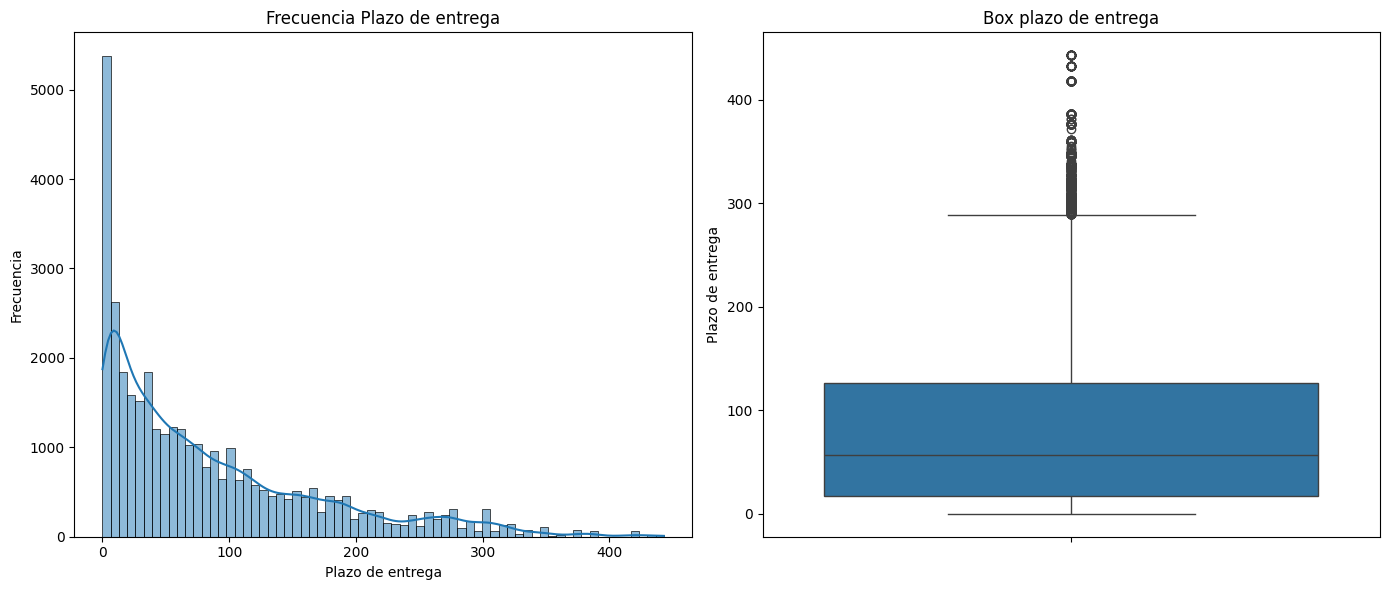

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Frequency plot (histogram) for lead_time
sns.histplot(data=df, x='lead_time', kde=True, ax=ax1)
ax1.set_title('Frecuencia Plazo de entrega')
ax1.set_xlabel('Plazo de entrega')
ax1.set_ylabel('Frecuencia')

# Box plot for lead_time
sns.boxplot(data=df, y='lead_time', ax=ax2)
ax2.set_title('Box plazo de entrega')
ax2.set_ylabel('Plazo de entrega')

plt.tight_layout()
plt.show()

In [ ]:
df["avg_price_per_room"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
avg_price_per_room,0.0,103.423539,99.45,540.0,35.089424,0.667133


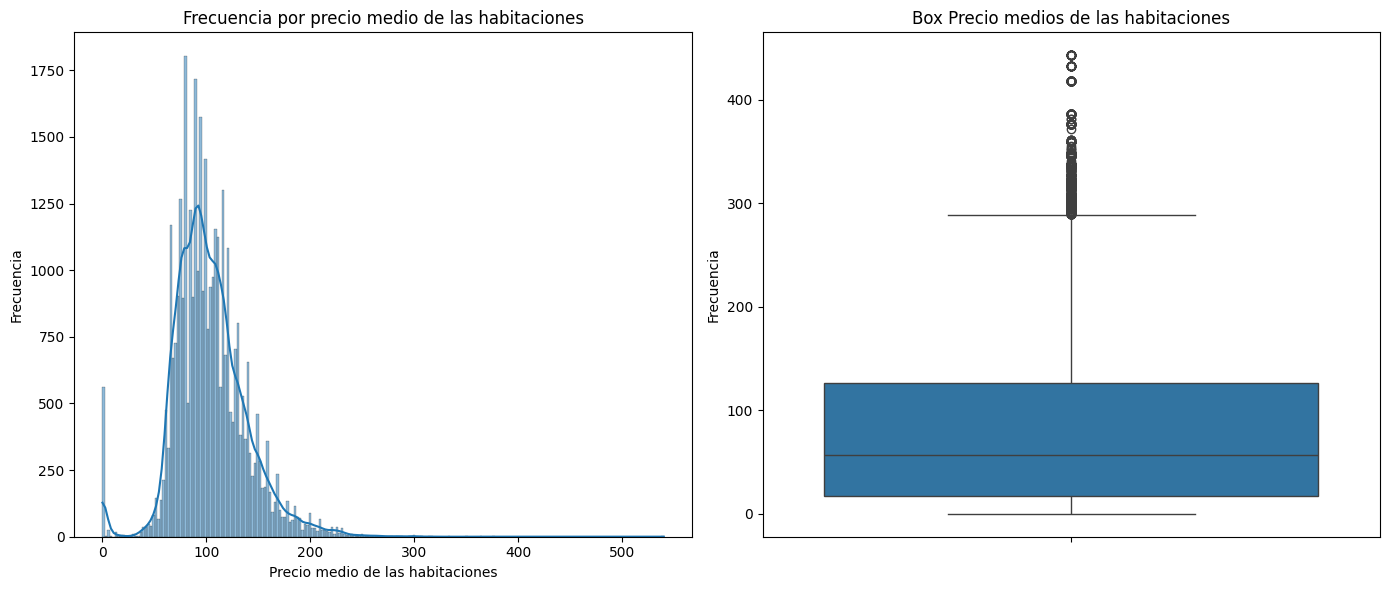

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Frequency plot (histogram) for lead_time
sns.histplot(data=df, x='avg_price_per_room', kde=True, ax=ax1)
ax1.set_title('Frecuencia por precio medio de las habitaciones')
ax1.set_xlabel('Precio medio de las habitaciones')
ax1.set_ylabel('Frecuencia')

# Box plot for lead_time
sns.boxplot(data=df, y='lead_time', ax=ax2)
ax2.set_title('Box Precio medios de las habitaciones')
ax2.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
#Calculamos Q1, Q3 e IQR para cada columna numérica del conjunto de datos
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
#IQR

con la nueva version de pandas la línea

Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)

se puede hacer de la siguiente forma

Q1 = df.select_dtypes('number').quantile(0.25)

In [ ]:
#ALiniemos el conjunto de datos y las series por la comparación
df_aligned, IQR_low_aligned = df.align(Q1 - 1.5 * IQR, join='inner', axis=1)
_, IQR_high_aligned = df.align(Q3 + 1.5 * IQR, join='inner', axis=1)
#df_aligned
#IQR_high_aligned
#IQR_low_aligned

In [ ]:
#Aplicamos la fórmula IQR. Esto devolverá un conjunto de datos con valores booleanos
#que indican si cada valor es un valor atípico
outliers_df = ((df_aligned < IQR_low_aligned) | (df_aligned > IQR_high_aligned))
#Comprobar si alguna fila contiene al menos un valor atípico
outliers = outliers_df.any(axis=1)

In [ ]:
print(f"Número de filas que contienen valores atípicos: {sum(outliers)}")

Número de filas que contienen valores atípicos: 19529


In [ ]:
# Calcular los límites inferior y superior de los valores atípicos de 'lead_time'.
Q1_lead_time = df['lead_time'].quantile(0.25)
Q3_lead_time = df['lead_time'].quantile(0.75)
IQR_lead_time = Q3_lead_time - Q1_lead_time
lower_bound_lead_time = Q1_lead_time - 1.5 * IQR_lead_time
upper_bound_lead_time = Q3_lead_time + 1.5 * IQR_lead_time

In [ ]:
# Calcular los límites inferior y superior de los valores atípicos de 'avg_price_per_room'
Q1_avg_price_per_room = df['avg_price_per_room'].quantile(0.25)
Q3_avg_price_per_room = df['avg_price_per_room'].quantile(0.75)
IQR_avg_price_per_room = Q3_avg_price_per_room - Q1_avg_price_per_room
lower_bound_avg_price_per_room = Q1_avg_price_per_room - 1.5 * IQR_avg_price_per_room
upper_bound_avg_price_per_room = Q3_avg_price_per_room + 1.5 * IQR_avg_price_per_room

In [ ]:
# Identificar los valores atípicos utilizando los límites inferior y superior.
outliers_lead_time = (df['lead_time'] < lower_bound_lead_time) | (df['lead_time'] > upper_bound_lead_time)
outliers_avg_price_per_room = (df['avg_price_per_room'] < lower_bound_avg_price_per_room) | (df['avg_price_per_room'] > upper_bound_avg_price_per_room)

In [ ]:
# Sustituir los valores atípicos en 'lead_time' y 'avg_price_per_room' por los valores no atípicos más cercanos.
df.loc[outliers_lead_time, 'lead_time'] = df['lead_time'].clip(lower=Q1_lead_time, upper=Q3_lead_time)
df.loc[outliers_avg_price_per_room, 'avg_price_per_room'] = df['avg_price_per_room'].clip(lower=Q1_avg_price_per_room, upper=Q3_avg_price_per_room)

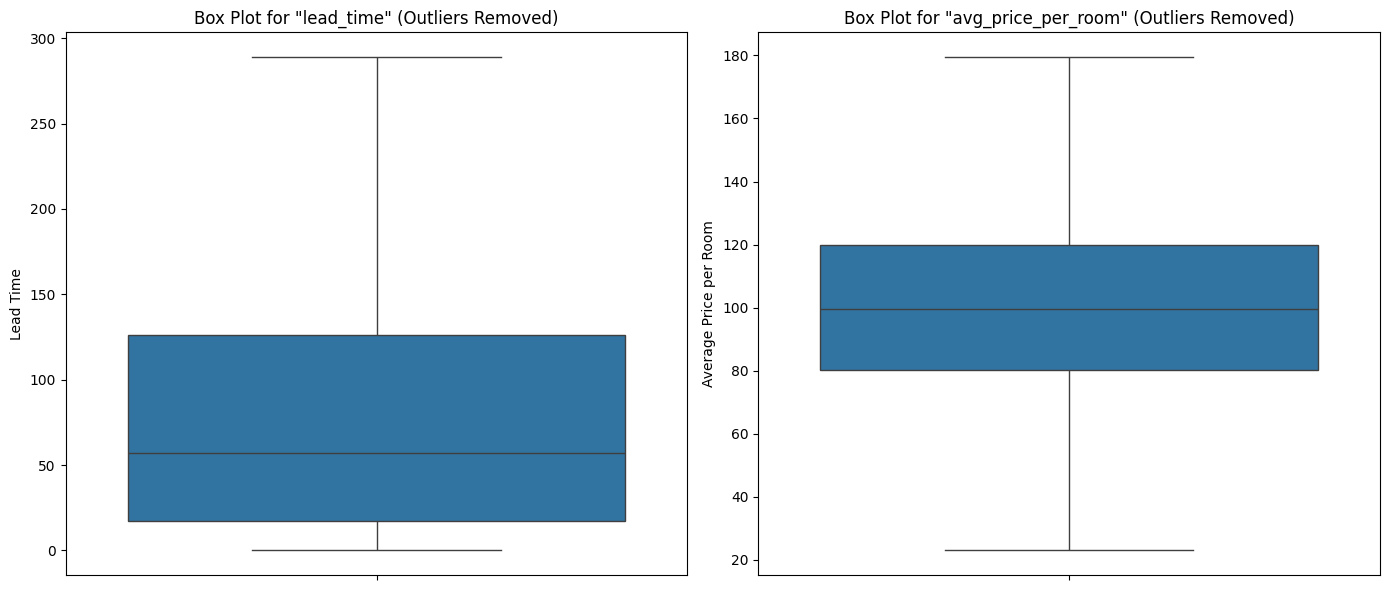

In [ ]:
# Establecer subtramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Box plot for 'lead_time' after removing outliers
sns.boxplot(data=df, y='lead_time', ax=ax1)
ax1.set_title('Box Plot for "lead_time" (Outliers Removed)')
ax1.set_ylabel('Lead Time')

# Box plot for 'avg_price_per_room' after removing outliers
sns.boxplot(data=df, y='avg_price_per_room', ax=ax2)
ax2.set_title('Box Plot for "avg_price_per_room" (Outliers Removed)')
ax2.set_ylabel('Average Price per Room')

plt.tight_layout()
plt.show()

2.8.    Análisis de series temporales

En esta sección nos centraremos en los aspectos temporales de nuestro conjunto de datos. Estudiaremos cómo influyen las siguientes columnas temporales en los resultados de las reservas:

*   Año de llegada: Al examinar los datos sobre una base anual, pretendemos identificar cualquier pauta o tendencia temporal relacionada con el estado de la reserva.
*   Mes de llegada: El análisis mensual proporciona información sobre las variaciones estacionales y su relación con los resultados de las reservas.
*   Fecha de llegada: El desglose por fechas específicas nos permite descubrir patrones dentro de los días del mes.

Estos análisis de series temporales se llevarán a cabo en el contexto de "booking_status", arrojando luz sobre el papel que desempeñan los factores temporales en la determinación de los resultados de las reservas.

Año de llegada

In [ ]:
def time_line_analysis(df, column_name):
    # Count the occurrences of each unique value in the column
    data_counts = df[column_name].value_counts().sort_index()

    plt.figure(figsize=(12, 6))
    plt.plot(data_counts.index, data_counts.values, marker='o', linestyle='-')

    plt.title(f"Line Chart for {column_name}")
    plt.ylabel("Frequency")
    plt.xlabel(column_name)

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

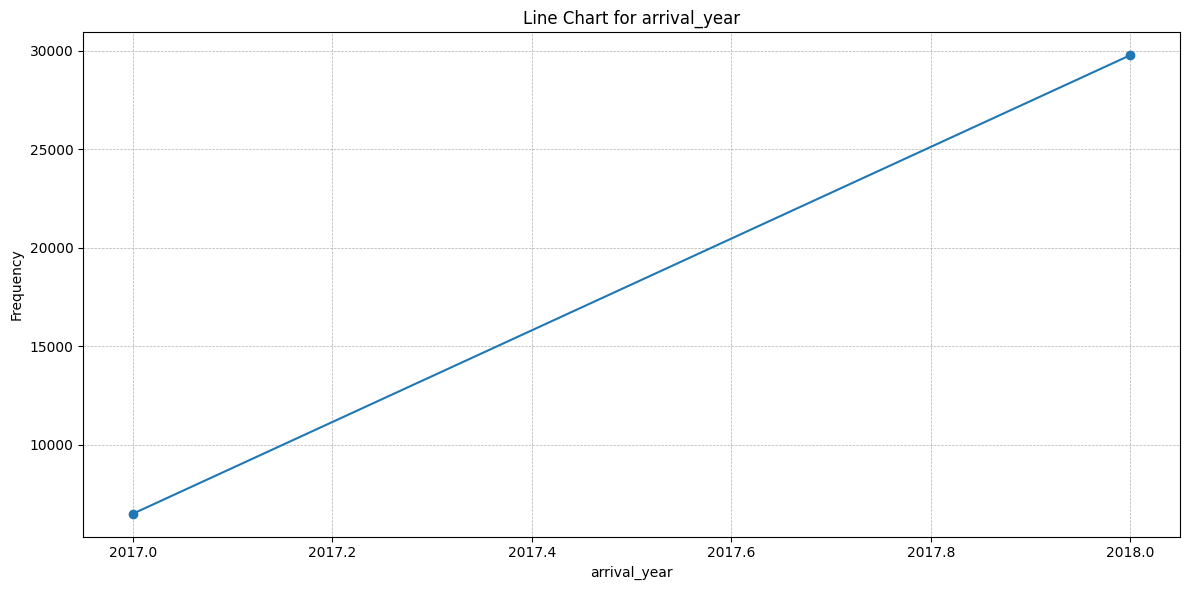

In [ ]:
time_line_analysis(df, 'arrival_year')

Mes de llegada

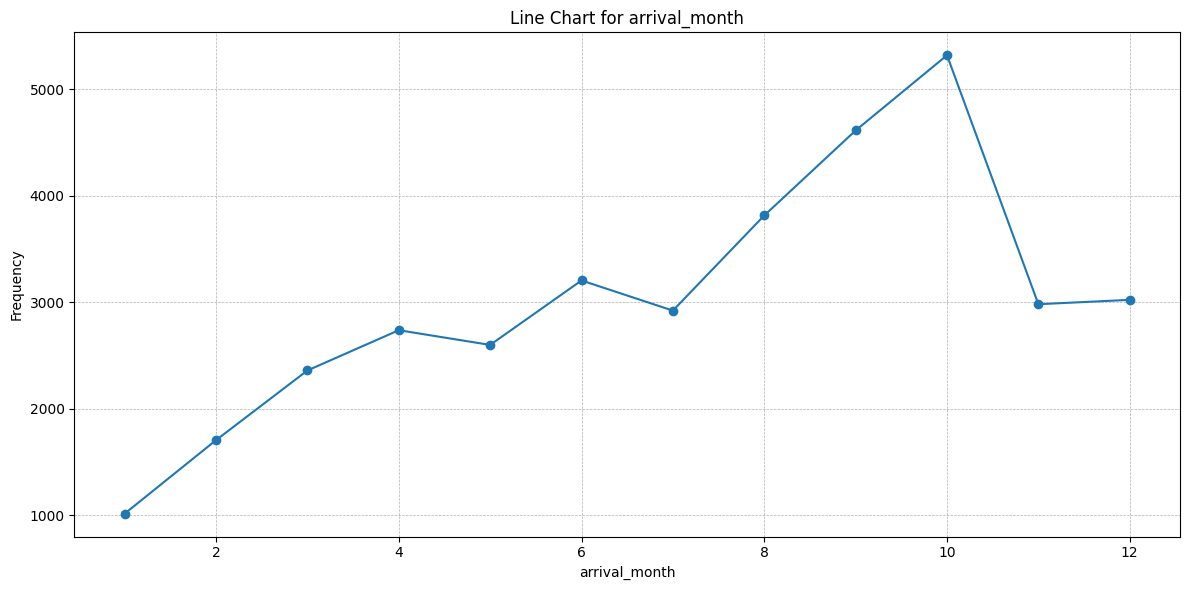

In [ ]:
time_line_analysis(df, 'arrival_month')

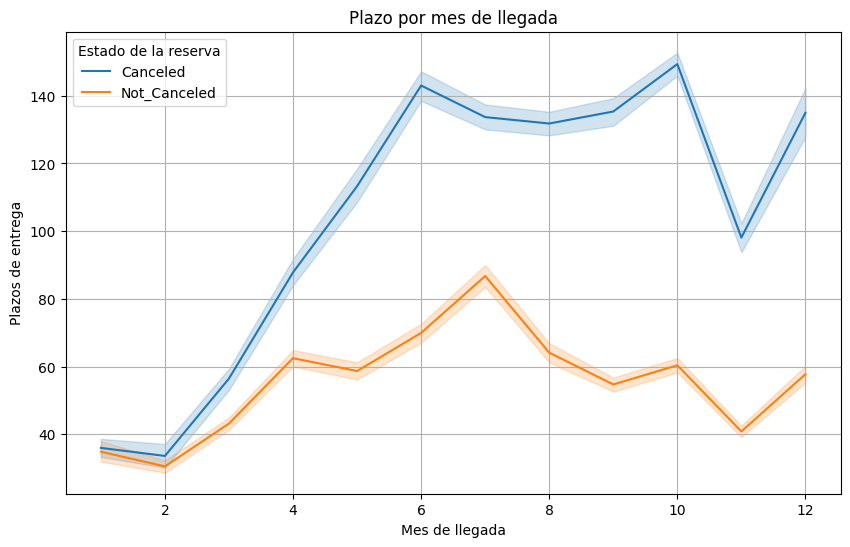

In [ ]:
# Create the line chart with hue
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='arrival_month', y='lead_time', hue='booking_status')
plt.title('Plazo por mes de llegada')
plt.xlabel('Mes de llegada')
plt.ylabel('Plazos de entrega')
plt.grid(True)
plt.legend(title='Estado de la reserva', loc='upper left')
plt.show()

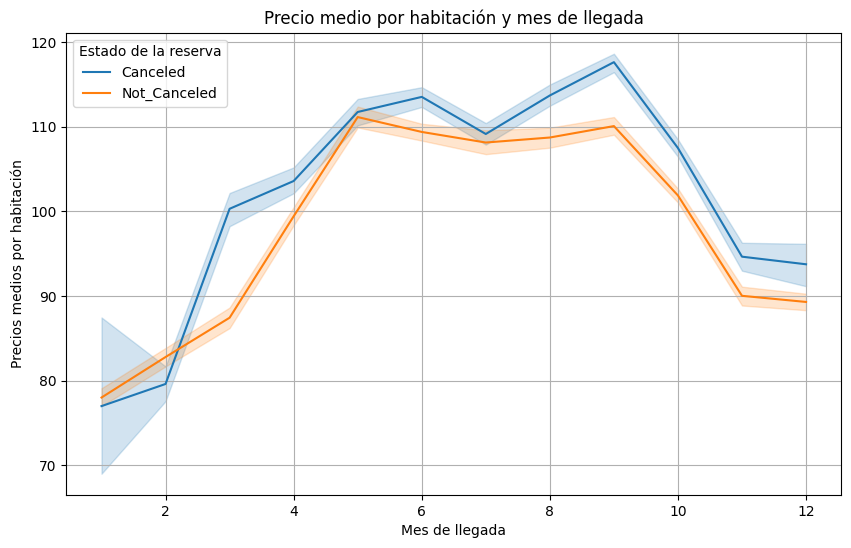

In [ ]:
# Create the line chart with hue
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='arrival_month', y='avg_price_per_room', hue='booking_status')
plt.title('Precio medio por habitación y mes de llegada')
plt.xlabel('Mes de llegada')
plt.ylabel('Precios medios por habitación')
plt.grid(True)
plt.legend(title='Estado de la reserva', loc='upper left')
plt.show()

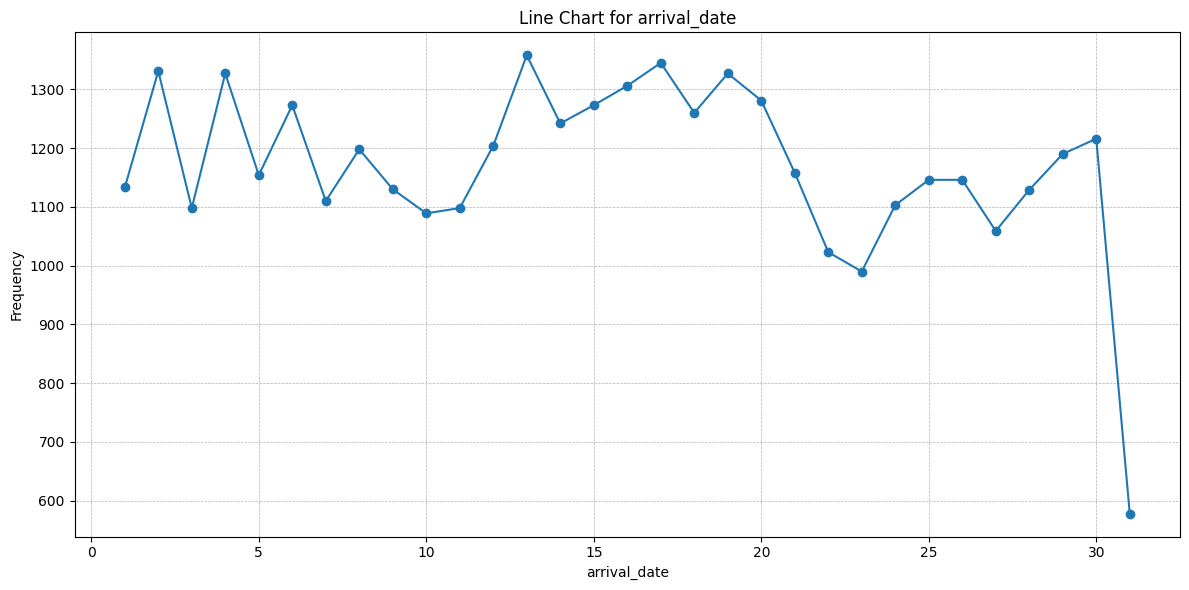

In [ ]:
time_line_analysis(df, 'arrival_date')

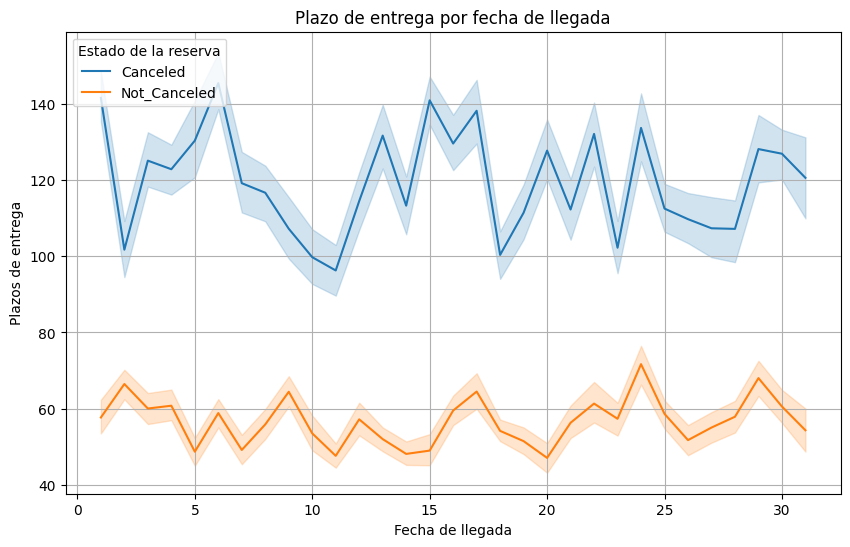

In [ ]:
# Create the line chart with hue
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='arrival_date', y='lead_time', hue='booking_status')
plt.title('Plazo de entrega por fecha de llegada')
plt.xlabel('Fecha de llegada')
plt.ylabel('Plazos de entrega')
plt.grid(True)
plt.legend(title='Estado de la reserva', loc='upper left')
plt.show()

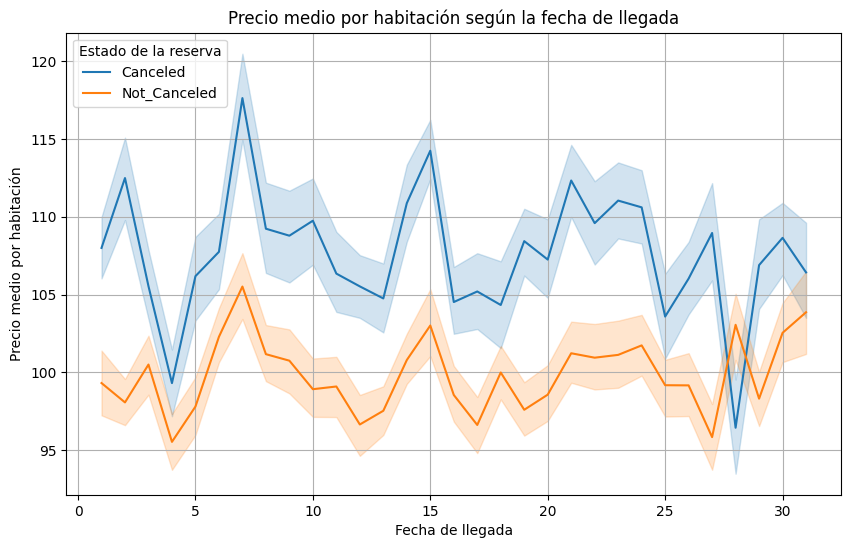

In [ ]:
# Create the line chart with hue
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='arrival_date', y='avg_price_per_room', hue='booking_status')
plt.title('Precio medio por habitación según la fecha de llegada')
plt.xlabel('Fecha de llegada')
plt.ylabel('Precio medio por habitación')
plt.grid(True)
plt.legend(title='Estado de la reserva', loc='upper left')
plt.show()

2.9.    Pruebas estadísticas y relaciones entre características

En esta sección, utilizamos pruebas estadísticas para explorar las asociaciones entre cada característica y la variable objetivo, "booking_status". La prueba Chi-cuadrado, muy adecuada para las características categóricas, es una herramienta clave para este análisis.


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['type_of_meal_plan'], df['booking_status'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 278.29490920586017
P-value: 4.951915406087789e-60


In [ ]:
df = df.drop(['Booking_ID', 'arrival_year', 'arrival_month', 'arrival_date', "no_of_week_nights", "no_of_weekend_nights"], axis=1)
df.head()

,no_of_adults,no_of_children,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled
3,2,0,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled
4,2,0,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled


In [ ]:
# Create a mapping from original values to numeric values
meal_seg_mapping = {
    'Offline': 0,
    'Online': 1,
    'Corporate': 2,
    'Complementary': 3,
    'Aviation': 4
}

# Use the mapping to replace values in the 'type_of_meal_plan' column
df['market_segment_type'] = df['market_segment_type'].map(meal_seg_mapping)

In [ ]:
# Create a mapping from original values to numeric values
meal_plan_mapping = {
    'Not Selected': 0,
    'Meal Plan 1': 1,
    'Meal Plan 2': 2,
    'Meal Plan 3': 3
}

# Use the mapping to replace values in the 'type_of_meal_plan' column
df['type_of_meal_plan'] = df['type_of_meal_plan'].map(meal_plan_mapping)

In [ ]:
df.replace(["Not_Canceled", "Canceled"], [0, 1], inplace=True)

In [ ]:
# Create a mapping from numerical values (0-6) to room types (1-7)
room_type_mapping = {
    "Room_Type 1" : 0,
    "Room_Type 2" : 1,
    "Room_Type 3" : 2,
    "Room_Type 4" : 3,
    "Room_Type 5" : 4,
    "Room_Type 6" : 5,
    "Room_Type 7" : 6
}

df['room_type_reserved'] = df['room_type_reserved'].map(room_type_mapping)

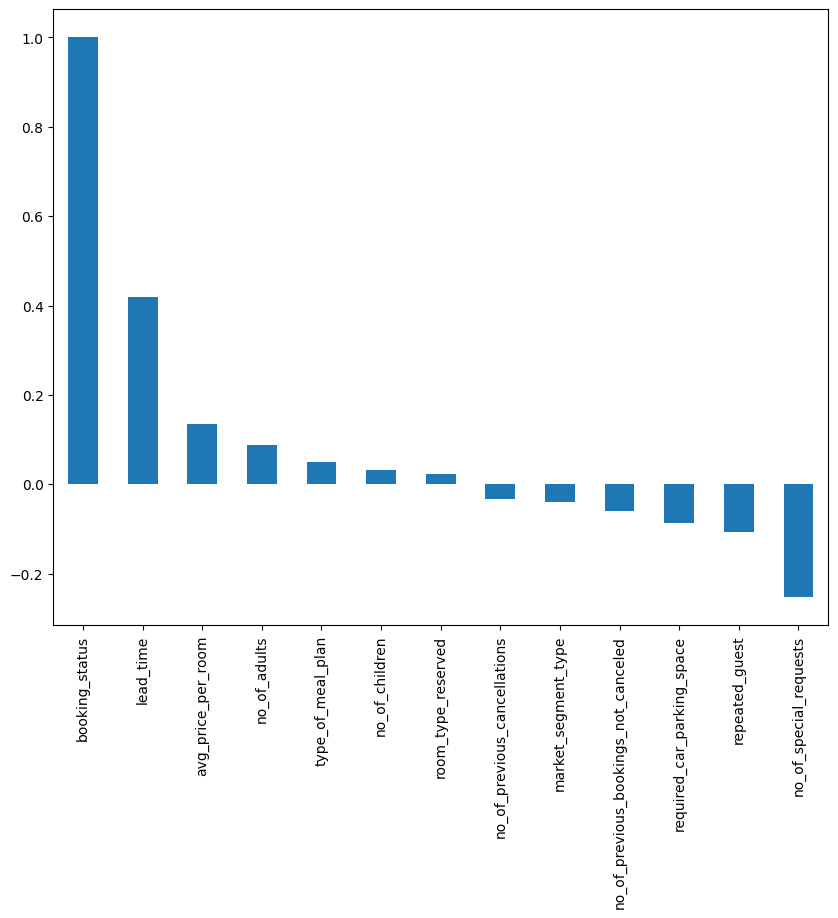

In [ ]:
# Include 'booking_status' in the correlation calculation
target_corr = df.corr()['booking_status'].sort_values(ascending=False)

# Plot the correlation
plt.figure(figsize=(10, 8))
target_corr.plot(kind='bar')
plt.show()

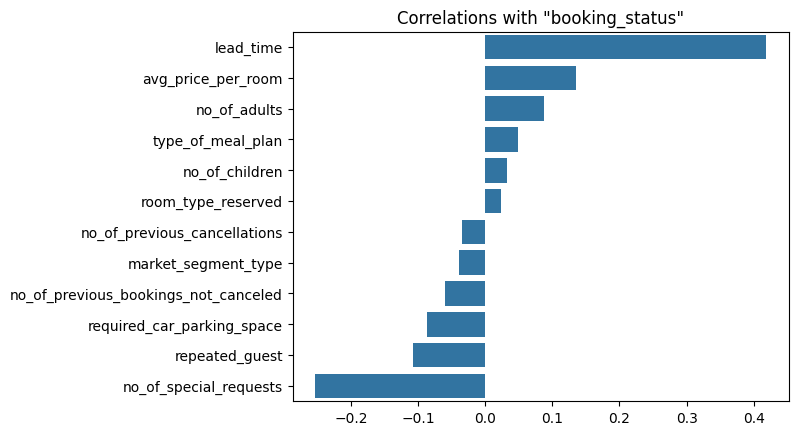

In [ ]:
limit = -1.0

data = df.corr()['booking_status'].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "booking_status"')
plt.show()

Los descubrimientos de las pruebas Chi-cuadrado revelan relaciones convincentes:

*   Tipo de plan de comidas: El valor P (4,95e-60) indica una relación muy significativa con "booking_status".

*   Tipo de habitación reservada: El valor P (1,56e-10) indica una relación sólida con "booking_status".

*   Tipo de segmento de mercado: El valor P (6,75e-175) subraya una asociación excepcionalmente fuerte con "booking_status".

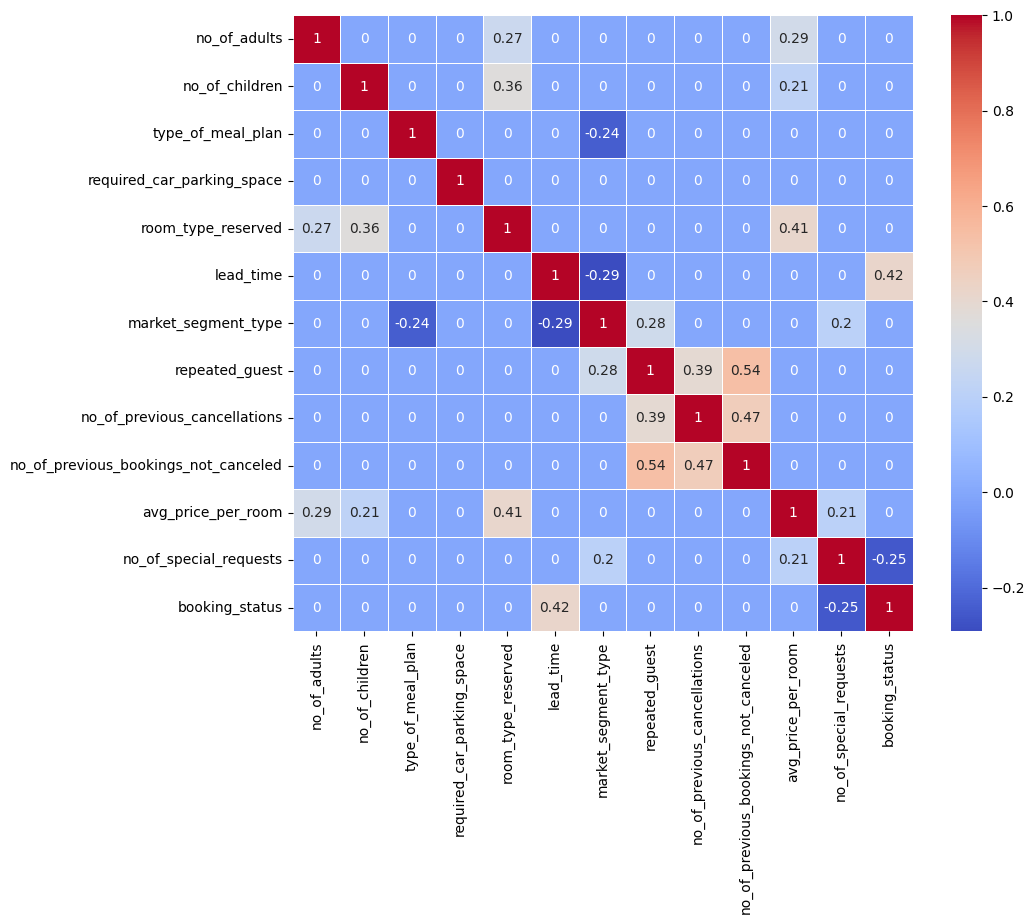

In [ ]:
corr = df.corr()
high_corr = corr[abs(corr) > 0.2].fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, cmap='coolwarm', annot=True, linewidths=.5)
plt.show()

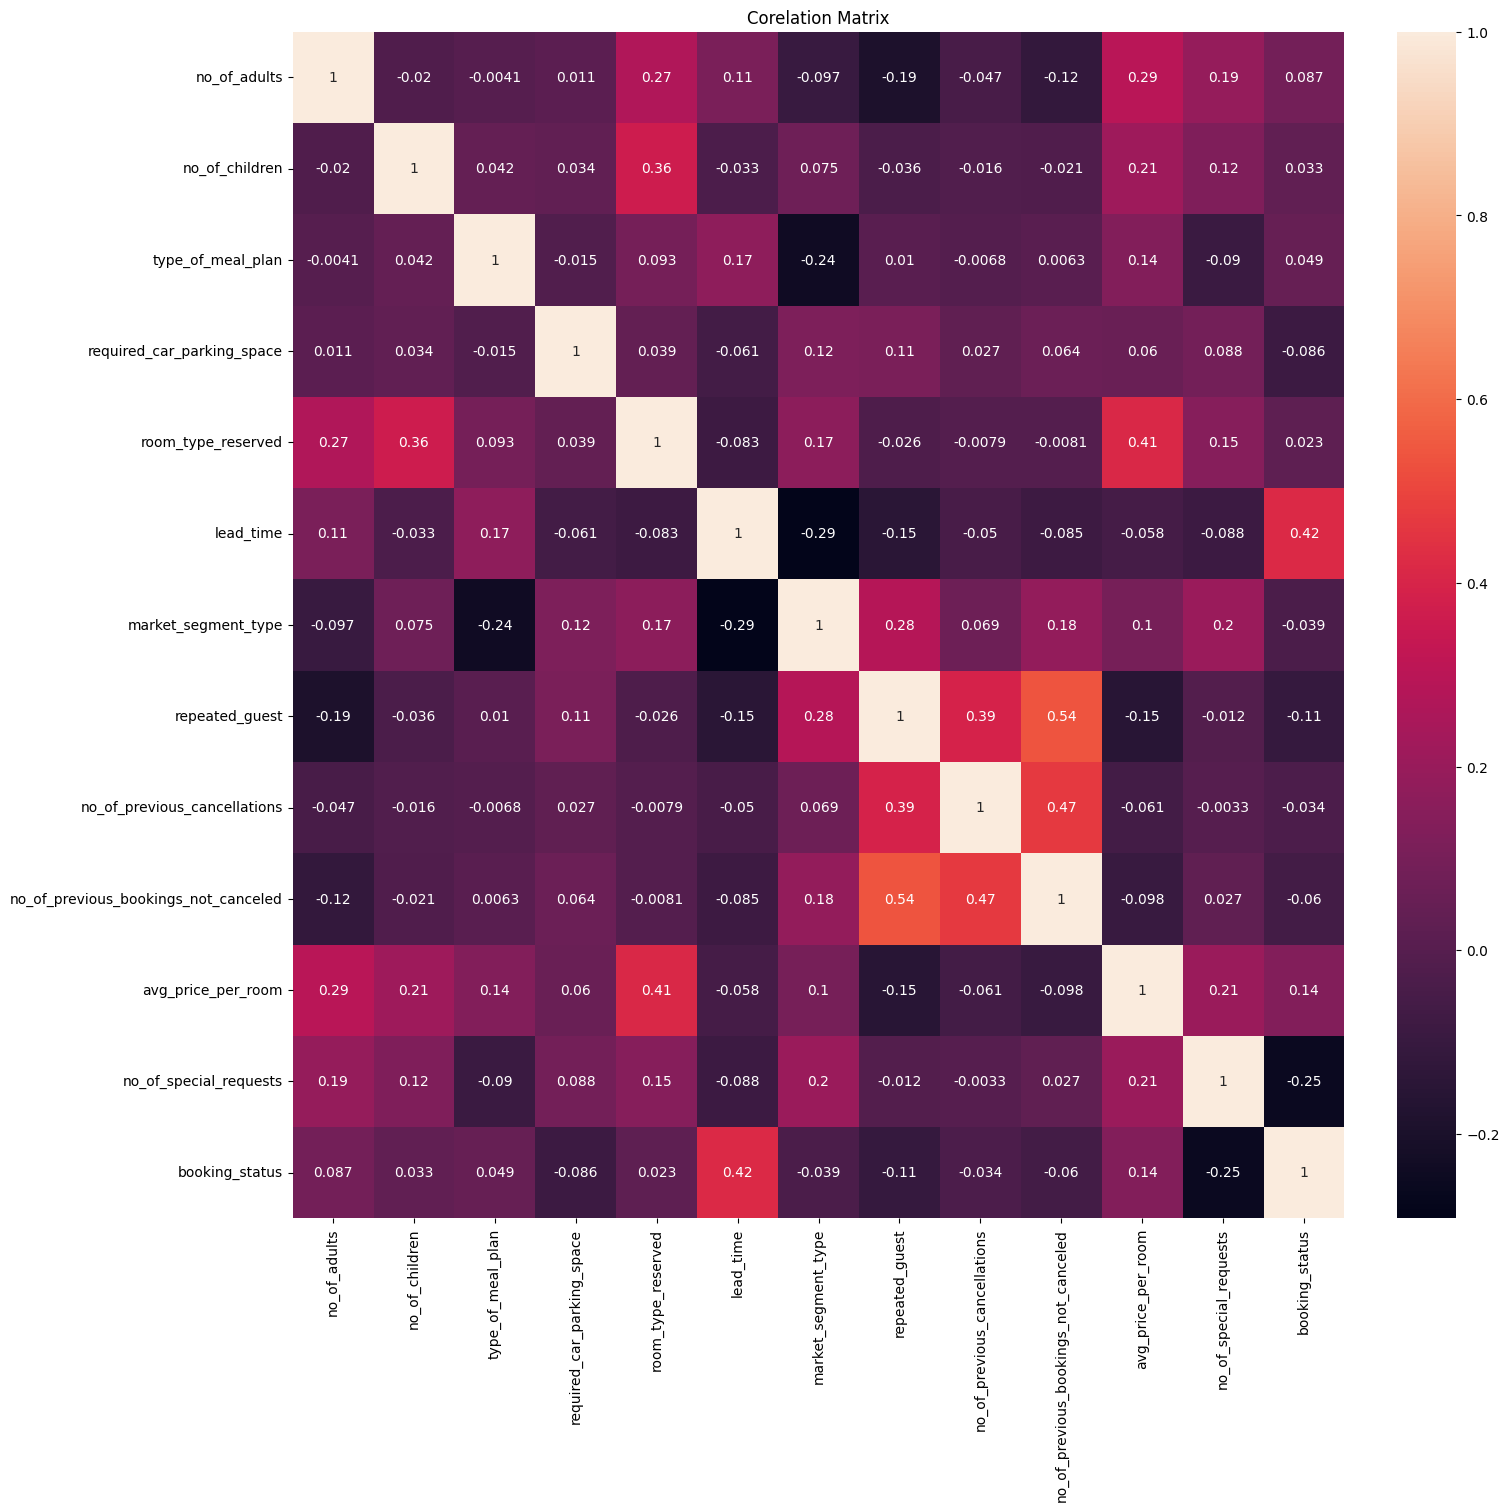

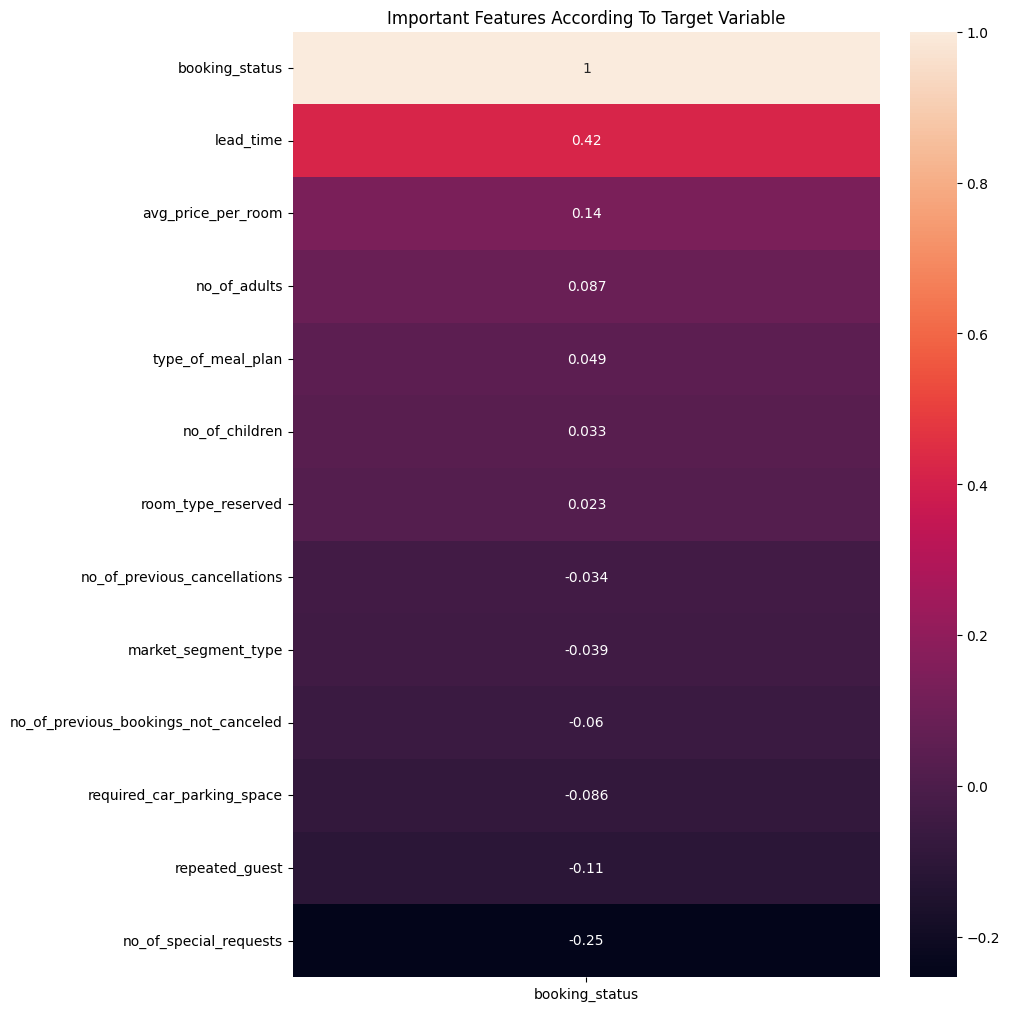

In [ ]:
# Corelation Matrix
cor=df.corr()
plt.figure(figsize=(15,15),layout='constrained')
plt.title('Corelation Matrix')
sns.heatmap(cor,annot=True)
plt.show()

# Checling important features according to target variable
cor=df.corr()
target=cor['booking_status']
target_s=target.sort_values(ascending=False)
plt.figure(figsize=(10,10),layout='constrained')
plt.title('Important Features According To Target Variable')
sns.heatmap(target_s.to_frame(),annot=True)
plt.show()

##3.0 **Machine Learning Model Building**

##Resumen del preprocesamiento de datos

Para preparar los datos para el aprendizaje automático, las características se transformaron en representaciones numéricas. El escalado robusto, que emplea el método del rango intercuartílico (IQR), gestionó eficazmente los valores atípicos en "lead_time" y "sales".

Antes de aplicar la técnica de sobremuestreo de minorías sintéticas (SMOTE), el conjunto de datos presentaba un desequilibrio: 24.390 casos de "no cancelado" y 11.885 casos de "cancelado". Este conjunto de datos depurado, con 13 columnas y 36.275 filas, sienta las bases para el posterior entrenamiento y análisis del modelo.

El conjunto de datos se dividió en un conjunto de entrenamiento (75%) y un conjunto de prueba (25%) para la evaluación del modelo.

In [ ]:
df.head()

,no_of_adults,no_of_children,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,0,0,224,0,0,0,0,65.00,0,0
1,2,0,0,0,0,5,1,0,0,0,106.68,1,0
2,1,0,1,0,0,1,1,0,0,0,60.00,0,1
3,2,0,1,0,0,211,1,0,0,0,100.00,0,1
4,2,0,0,0,0,48,1,0,0,0,94.50,0,1


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('booking_status', axis=1)   # Features
y = df['booking_status']                # Target variables

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42, stratify=y)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

##Optimización del modelo de datos

Para mejorar el rendimiento predictivo de nuestros modelos, se empleó un enfoque de búsqueda en cuadrícula para identificar los hiperparámetros óptimos de los siguientes clasificadores:

1.  Regresión logística:
    *   Parámetros ajustados: C (intensidad de la regularización) y penalización (tipo de regularización).
    *   Parámetros óptimos: {'C': 0.01, 'penalización': 'l2'}

2.  Clasificación Random Forest:

    *   Parámetros ajustados: bootstrap, max_depth, min_samples_leaf, min_samples_split, y n_estimators.
    *   Mejores parámetros: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}

3.  Clasificación en árbol de decisión:

    *   Parámetros ajustados: criterion, max_depth, max_features, min_samples_leaf, min_samples_split y splitter.
    *   Mejores parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

4.  K-Nearest Neighbors (KNN):

    *   Parámetros ajustados: algoritmo, n_vecinos, p, y pesos.
    *   Mejores parámetros: {'algoritmo': 'bruto', 'n_vecinos': 9, 'p': 1, 'pesos': 'distancia'}

5.  Naive Bayes:
    *   Se deja sin parámetros

6.  XGBoost:
    *   Parámetros: {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "binary:logistic", "nthread":1} rondas = 10

##Entrenamiento de los modelos

Los modelos se entrenaron con los datos de entrenamiento remuestreados, que incorporaban la Técnica de Sobremuestreo Sintético de Minorías (SMOTE) para abordar el desequilibrio de clases. Los modelos optimizados son los siguientes

*   **Regresión logística:** Utilización de los mejores parámetros obtenidos a partir de la búsqueda en cuadrícula.

*   **Clasificación Bosque aleatorio:** Empleando los mejores parámetros identificados mediante la búsqueda en cuadrícula.

*   **Clasificación de árbol de decisión:** Entrenado con el disco de hiperparámetros óptimo.

*   **K-Vecinos más próximos (KNN):** Utilizando los mejores parámetros obtenidos de la búsqueda en cuadrícula.

*   **Naive Bayes:** por ser muy básico no requiere mucha configuración de parámetros, inclusive solamente cuenta con tan solo dos parámetros, que por lo general no se utilizan.

*   **XGBoost (Extreme Gradient Boosting):** es uno de los algoritmos de machine learning de tipo supervisado más usados en la actualidad.
Este algoritmo se caracteriza por obtener buenos resultados de predicción con relativamente poco esfuerzo, en muchos casos equiparables o mejores que los devueltos por modelos más complejos computacionalmente, en particular para problemas con datos heterogéneos.
Estos modelos optimizados forman colectivamente la base de nuestro marco predictivo, proporcionando una mayor precisión y robustez.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


# Definir modelos con los mejores parámetros
rf_model = RandomForestClassifier(bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150)
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, splitter='best')
logistic_model = LogisticRegression(C=0.01, penalty='l2')
knn_model = KNeighborsClassifier(algorithm='brute', n_neighbors=9, p=1, weights='distance')  # KNN con los mejores parámetros
nb_model = GaussianNB()
XGB_model = XGBClassifier(ojetivo = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "binary:logistic", "nthread":1}, random_state=10)

# Modelos de entrenamiento
rf_model.fit(X_resampled, y_resampled)
dt_model.fit(X_resampled, y_resampled)
logistic_model.fit(X_resampled, y_resampled)
knn_model.fit(X_resampled, y_resampled)
nb_model.fit(X_resampled, y_resampled)
XGB_model.fit(X_resampled, y_resampled)

# Evaluar los modelos en el conjunto de prueba
rf_predictions = rf_model.predict(X_test_scaled)
dt_predictions = dt_model.predict(X_test_scaled)
logistic_predictions = logistic_model.predict(X_test_scaled)
knn_predictions = knn_model.predict(X_test_scaled)
nb_predictions = nb_model.predict(X_test_scaled)
XGB_predictions = XGB_model.predict(X_test_scaled)

# Generar informes de clasificación
rf_report = classification_report(y_test, rf_predictions, output_dict=True)
dt_report = classification_report(y_test, dt_predictions, output_dict=True)
logistic_report = classification_report(y_test, logistic_predictions, output_dict=True)
knn_report = classification_report(y_test, knn_predictions, output_dict=True)
nb_report = classification_report(y_test, nb_predictions, output_dict=True)
XGB_report = classification_report(y_test, XGB_predictions, output_dict=True)

##**Resumen del rendimiento de los modelos**

Para evaluar la capacidad de predicción de nuestros modelos, hemos empleado una serie de técnicas y parámetros de evaluación:

*   **Curvas de precisión-recuerdo:** Visualizamos las compensaciones entre precisión y recuperación para cada modelo, proporcionando información sobre su precisión de predicción positiva.

*   **Métricas de clasificación:** Se utilizaron la precisión, la recuperación, la exactitud y la puntuación F1 para evaluar de forma exhaustiva el rendimiento de los modelos en el conjunto de pruebas.

*   **Validación cruzada estratificada k-pliegues:** Garantizó la solidez y la generalizabilidad de los modelos manteniendo la coherencia de la distribución de clases en todos los pliegues.

*   **Matriz de confusión:** Ofrece un desglose detallado de las predicciones del modelo, ayudando a comprender los verdaderos positivos, los verdaderos negativos, los falsos positivos y los falsos negativos.

*   **Importancia de las características (Random Forest):** Analizó la importancia de cada característica en la predicción del estado de la reserva.

El modelo Random Forest destacó con una puntuación F1 de 0,868632, lo que refleja un gran equilibrio entre precisión y recuperación. Esta evaluación exhaustiva proporciona información valiosa sobre los puntos fuertes de los modelos y las áreas que pueden mejorarse, lo que orienta nuestro enfoque para futuras iteraciones.

In [ ]:
# Extraer métricas de informes de clasificación
rf_metrics = [rf_report['weighted avg']['f1-score'], rf_report['weighted avg']['recall'], rf_report['accuracy'], rf_report['weighted avg']['precision']]
dt_metrics = [dt_report['weighted avg']['f1-score'], dt_report['weighted avg']['recall'], dt_report['accuracy'], dt_report['weighted avg']['precision']]
logistic_metrics = [logistic_report['weighted avg']['f1-score'], logistic_report['weighted avg']['recall'], logistic_report['accuracy'], logistic_report['weighted avg']['precision']]
knn_metrics = [knn_report['weighted avg']['f1-score'], knn_report['weighted avg']['recall'], knn_report['accuracy'], knn_report['weighted avg']['precision']]
nb_metrics = [nb_report['weighted avg']['f1-score'], nb_report['weighted avg']['recall'], nb_report['accuracy'], nb_report['weighted avg']['precision']]
XGB_metrics = [XGB_report['weighted avg']['f1-score'], XGB_report['weighted avg']['recall'], XGB_report['accuracy'], XGB_report['weighted avg']['precision']]

# Crear un marco de datos para almacenar las métricas de evaluación
evaluation_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN', 'Naive Bayes', 'X Gradients Boosting'],
    'F1 Score': [rf_metrics[0], dt_metrics[0], logistic_metrics[0], knn_metrics[0], nb_metrics[0], XGB_metrics[0]],
    'Recall': [rf_metrics[1], dt_metrics[1], logistic_metrics[1], knn_metrics[1], nb_metrics[1], XGB_metrics[1]],
    'Accuracy': [rf_metrics[2], dt_metrics[2], logistic_metrics[2], knn_metrics[2], nb_metrics[2], XGB_metrics[2]],
    'Precision': [rf_metrics[3], dt_metrics[3], logistic_metrics[3], knn_metrics[3], nb_metrics[3], XGB_metrics[3]]
})

evaluation_df

,Model,F1 Score,Recall,Accuracy,Precision
0,Random Forest,0.868329,0.868012,0.868012,0.868720
1,Decision Tree,0.843594,0.842541,0.842541,0.845244
2,Logistic Regression,0.758588,0.753225,0.753225,0.772267
3,KNN,0.858783,0.857757,0.857757,0.860526
4,Naive Bayes,0.272597,0.380527,0.380527,0.735149
5,X Gradients Boosting,0.859695,0.858088,0.858088,0.863230


In [ ]:
evaluation_df.T

,0,1,2,3,4,5
Model,Random Forest,Decision Tree,Logistic Regression,KNN,Naive Bayes,X Gradients Boosting
F1 Score,0.868329,0.843594,0.758588,0.858783,0.272597,0.859695
Recall,0.868012,0.842541,0.753225,0.857757,0.380527,0.858088
Accuracy,0.868012,0.842541,0.753225,0.857757,0.380527,0.858088
Precision,0.86872,0.845244,0.772267,0.860526,0.735149,0.86323


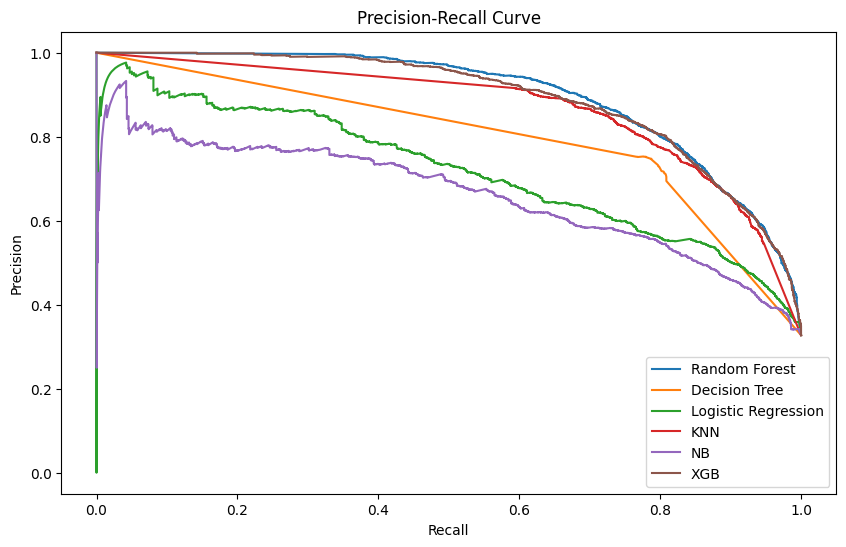

In [ ]:
# Curvas de precisión y recuperación
plt.figure(figsize=(10, 6))

# Curva de precisión/recuperación de Bosque aleatorio
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(recall_rf, precision_rf, label='Random Forest')

# Curva de precisión/recuperación del árbol de decisión
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(recall_dt, precision_dt, label='Decision Tree')

# Curva de precisión/recuperación de la regresión logística
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(recall_logistic, precision_logistic, label='Logistic Regression')

# Curva de precisión/recuperación de KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(recall_knn, precision_knn, label='KNN')

# Curva de precisión/recuperación de Naive Bayes
precision_nb, recall_nb, _ = precision_recall_curve(y_test, nb_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(recall_nb, precision_nb, label='NB')

# Curva de precisión/recuperación de XGBoost
precision_XGB, recall_XGB, _ = precision_recall_curve(y_test, XGB_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(recall_XGB, precision_XGB, label='XGB')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

##Obtener importancias de características del modelo Random Forest

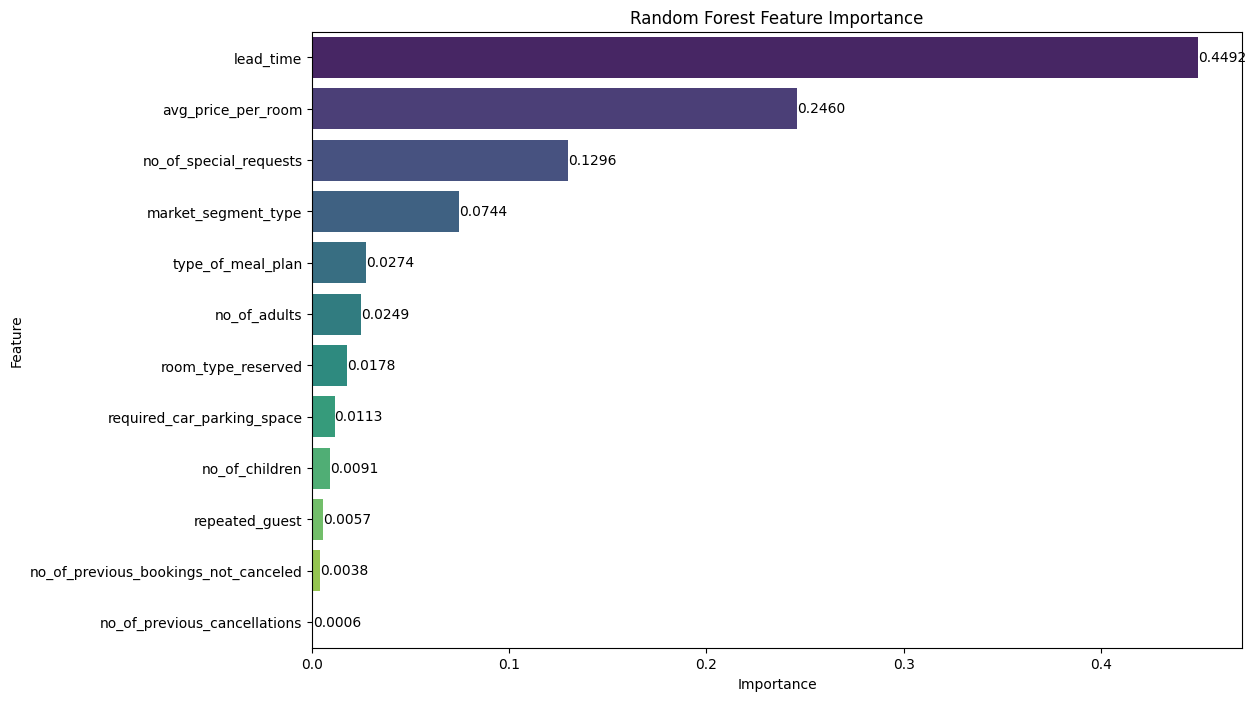

In [ ]:
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para almacenar los nombres de las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': ['no_of_adults', 'no_of_children', 'type_of_meal_plan', 'required_car_parking_space',
                                                  'room_type_reserved', 'lead_time', 'market_segment_type', 'repeated_guest',
                                                  'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                                                  'avg_price_per_room', 'no_of_special_requests'],
                                       'Importance': feature_importances})

# Ordenar las características en función de su importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Trazar las importancias de las características
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10)

plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

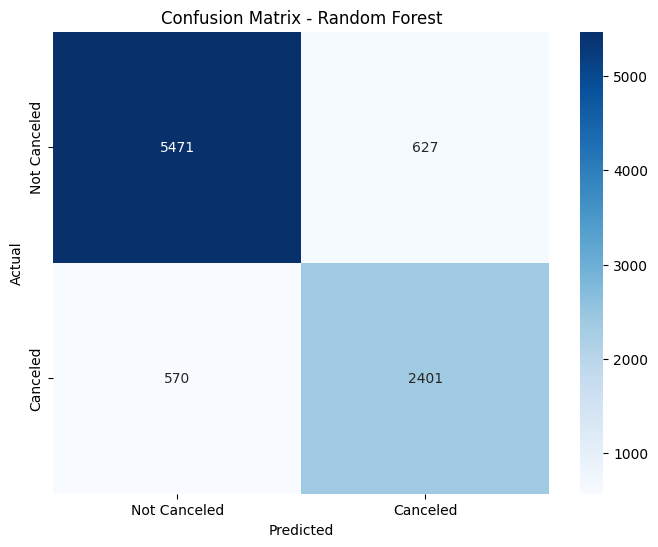

In [ ]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Create a DataFrame with actual and predicted labels for Random Forest
rf_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})

# Display the DataFrame
rf_results_df.head(10)

,Actual,Predicted
6062,0,0
13853,0,0
27195,0,0
22666,0,0
36154,1,1
3105,0,0
23639,0,1
6789,0,0
19525,0,0
19760,0,0


##Obtener importancias de características del modelo XGBoost

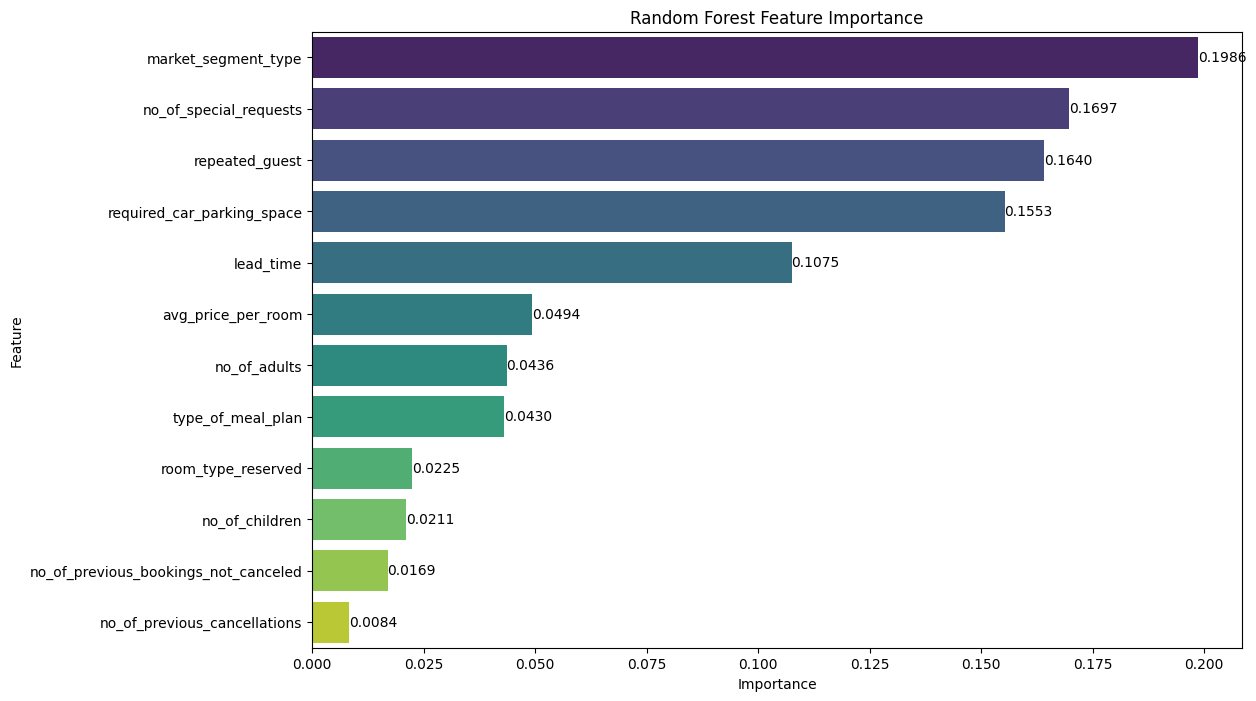

In [ ]:
feature_importances = XGB_model.feature_importances_

# Crear un DataFrame para almacenar los nombres de las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': ['no_of_adults', 'no_of_children', 'type_of_meal_plan', 'required_car_parking_space',
                                                  'room_type_reserved', 'lead_time', 'market_segment_type', 'repeated_guest',
                                                  'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                                                  'avg_price_per_room', 'no_of_special_requests'],
                                       'Importance': feature_importances})

# Ordenar las características en función de su importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Trazar las importancias de las características
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10)

plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

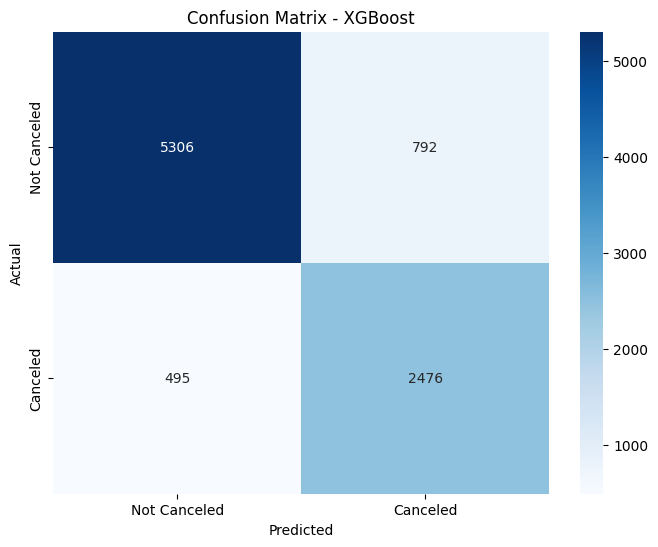

In [ ]:
# Create a confusion matrix for Random Forest
conf_matrix_XGBoost = confusion_matrix(y_test, XGB_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_XGBoost, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Create a DataFrame with actual and predicted labels for Random Forest
XGB_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': XGB_predictions})

# Display the DataFrame
XGB_results_df.head(10)

,Actual,Predicted
6062,0,0
13853,0,0
27195,0,0
22666,0,0
36154,1,1
3105,0,0
23639,0,1
6789,0,0
19525,0,0
19760,0,0


##**A partir de los resultados podemos observar que:**

1.  Como la precisión de entrenamiento y prueba no es similar, hay una alta varianza presente en los modelos.
2.  Como la precisión de las pruebas y la puntuación F1 de los modelos son casi similares, existe un bajo sesgo en los modelos. Estos dos fenómenos indican que existe un problema de sobreajuste en los modelos.

**Sobreajuste** - Cuando los modelos ML se entrenan con un exceso de datos, en ese caso aprenden también de datos ruidosos e inexactos. Como aprende de datos ruidosos e imprecisos, no puede predecir perfectamente los datos de prueba. Este fenómeno se denomina sobreajuste. Surgirá si hay un sesgo bajo y una varianza alta en el modelo.


Métodos para eliminar el sobreajuste:

1.  Validación cruzada
2.  Técnicas de aprendizaje conjunto
3.  Técnicas de regularización

Aquí utilizamos el método de validación cruzada K Fold estratificado para eliminar el sobreajuste.


##Método de validación cruzada para eliminar el sobreajuste

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Definir el RandomForestClassifier con los mejores parámetros
rf_model = RandomForestClassifier(bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150)

# Definir el número de descisiones para StratifiedKFold
n_splits = 5

# Inicializar  StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Inicializar la lista para almacenar las puntuaciones de F1 for each fold
f1_score_list = []

# Haga un bucle a través de cada pliegue
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    # Divida los datos en conjuntos de entrenamiento y de prueba para este pliegue
    X_train_fold, X_test_fold = X_resampled[train_index], X_resampled[test_index]
    y_train_fold, y_test_fold = y_resampled[train_index], y_resampled[test_index]

    # Train the RandomForestClassifier on the training data for this fold
    rf_model.fit(X_train_fold, y_train_fold)

    # Entrenar el RandomForestClassifier en los datos de entrenamiento para este pliegue
    y_pred_fold = rf_model.predict(X_test_fold)

    # Calcular la puntuación F1 de este pliegue
    f1_fold = f1_score(y_test_fold, y_pred_fold)

    # Añade la puntuación F1 a la lista
    f1_score_list.append(f1_fold)

# Calcular la puntuación F1 media de todos los pliegues
average_f1_score = sum(f1_score_list) / n_splits

# Imprimir la puntuación media de F1
print("Average F1 Score:", average_f1_score)

Average F1 Score: 0.8826983649787092


In [ ]:
# Definir el RandomForestClassifier con los mejores parámetros
XGB_model = XGBClassifier(ojetivo = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "binary:logistic", "nthread":1}, random_state=10)
# Definir el número de descisiones para StratifiedKFold
n_splits = 5

# Inicializar  StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Inicializar la lista para almacenar las puntuaciones de F1 for each fold
f1_score_list = []

# Haga un bucle a través de cada pliegue
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    # Divida los datos en conjuntos de entrenamiento y de prueba para este pliegue
    X_train_fold, X_test_fold = X_resampled[train_index], X_resampled[test_index]
    y_train_fold, y_test_fold = y_resampled[train_index], y_resampled[test_index]

    # Train the RandomForestClassifier on the training data for this fold
    XGB_model.fit(X_train_fold, y_train_fold)

    # Entrenar el RandomForestClassifier en los datos de entrenamiento para este pliegue
    y_pred_fold = XGB_model.predict(X_test_fold)

    # Calcular la puntuación F1 de este pliegue
    f1_fold = f1_score(y_test_fold, y_pred_fold)

    # Añade la puntuación F1 a la lista
    f1_score_list.append(f1_fold)

# Calcular la puntuación F1 media de todos los pliegues
average_f1_score = sum(f1_score_list) / n_splits

# Imprimir la puntuación media de F1
print("Average F1 Score:", average_f1_score)

Average F1 Score: 0.8585814662828252


#Conclusión

En nuestra meticulosa evaluación de los modelos predictivos, cada uno de ellos se sometió a una rigurosa optimización mediante búsqueda en cuadrícula. El modelo Random Forest resultó ser el más destacado, con unas métricas excepcionales:

**Puntuación F1:** 0.868329

**Precisión:** 0.86872

Estos resultados ponen de manifiesto un sólido equilibrio entre precisión y recuperación, lo que confirma la eficacia del algoritmo Random Forest para predecir las cancelaciones de reservas hoteleras. El impacto de la optimización de la búsqueda en cuadrícula es evidente en el mayor rendimiento del modelo.

En comparación, el modelo XGBoost, también optimizado mediante la búsqueda en la cuadrícula, obtuvo una impresionante puntuación F1 de 0.859695, mientras que el modelo de árbol de decisión alcanzó una notable puntuación de 0.843594. Estos resultados proporcionan información valiosa sobre el impacto general de la búsqueda en cuadrícula en el rendimiento de los modelos de los distintos algoritmos.

La validación cruzada estratificada de k pliegues subrayó aún más la fiabilidad del bosque aleatorio, manteniendo una impresionante puntuación F1 media de 0,88 en diversos pliegues. Esta consistencia habla de la robustez y generalizabilidad del modelo, reiterando la influencia positiva de la optimización de la búsqueda en cuadrícula.

Entre los predictores clave identificados por el modelo Random Forest se encuentran el "plazo de entrega" (0,4492), el "precio medio de las habitaciones" (0,2460) y el "número de peticiones especiales" (0,1296). Reconocer estos factores influyentes contribuye a matizar la toma de decisiones y ofrece vías para futuras mejoras del modelo.